# AutoEncoder and Decoder

## Basic/Vanilla Autoencoder

### Load Modules

In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

### Data Loading and Preprocessing

In [2]:
# We only need images (x), not labels (_)
# keras.datasets.fashion_mnist.load_data()
(x_train, _), (x_test, _) = fashion_mnist.load_data()
print(x_train.shape)
print(x_test.shape)

# Normalizes pixel values from [0, 255] to [0, 1] by dividing by 255
# Why normalize?
# - Neural networks train better with values in [0, 1] range
# - Prevents gradient explosion/vanishing
# - Makes optimization more stable
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


#### Comparison b/w Original and Normalized Image

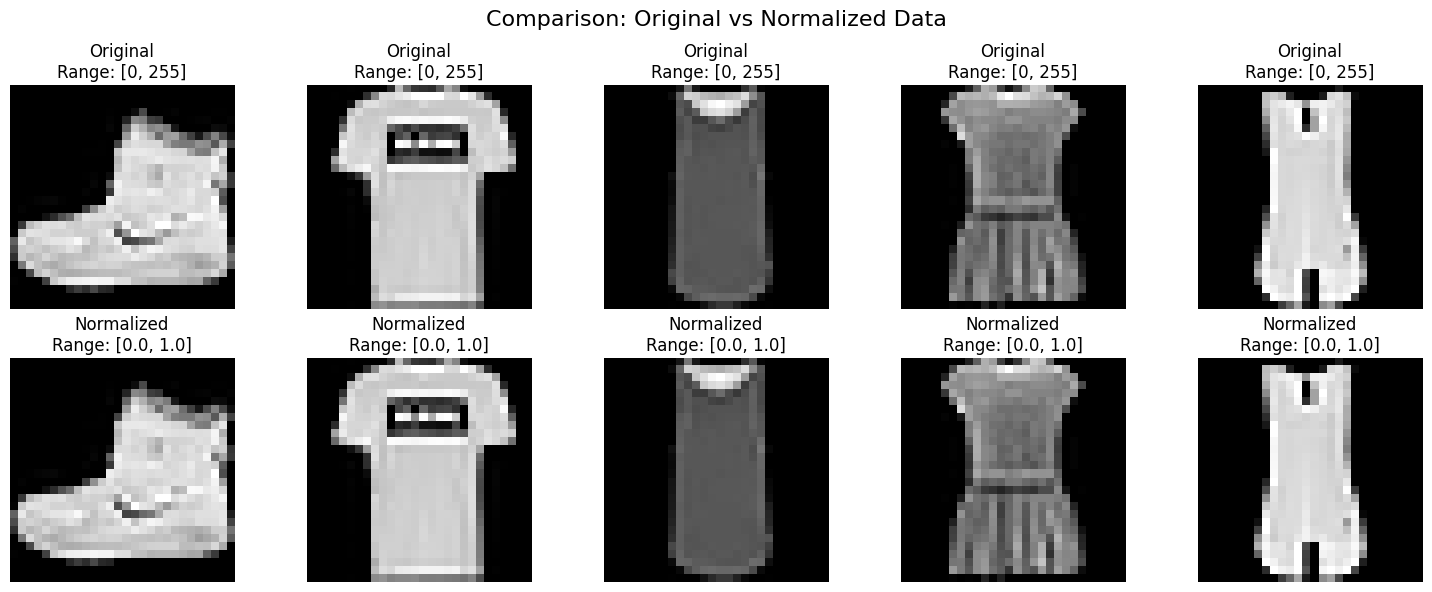

Original data:
  - Range: [0, 255]
  - Data type: uint8
  - Mean: 72.94

Normalized data:
  - Range: [0.0, 1.0]
  - Data type: float32
  - Mean: 0.2860


In [3]:
# BEFORE normalization - load raw data again
(x_raw, _), (_, _) = fashion_mnist.load_data()

# Show comparison
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(5):
    # Original (0-255 range)
    axes[0, i].imshow(x_raw[i], cmap='gray', vmin=0, vmax=255)
    axes[0, i].set_title(f'Original\nRange: [{x_raw[i].min()}, {x_raw[i].max()}]')
    axes[0, i].axis('off')

    # Normalized (0-1 range)
    axes[1, i].imshow(x_train[i], cmap='gray', vmin=0, vmax=1)
    axes[1, i].set_title(f'Normalized\nRange: [{x_train[i].min():.1f}, {x_train[i].max():.1f}]')
    axes[1, i].axis('off')

axes[0, 0].set_ylabel('Original\n(0-255)', fontsize=12, rotation=0, ha='right')
axes[1, 0].set_ylabel('Normalized\n(0-1)', fontsize=12, rotation=0, ha='right')

plt.suptitle('Comparison: Original vs Normalized Data', fontsize=16)
plt.tight_layout()
plt.show()

print("Original data:")
print(f"  - Range: [{x_raw.min()}, {x_raw.max()}]")
print(f"  - Data type: {x_raw.dtype}")
print(f"  - Mean: {x_raw.mean():.2f}")

print("\nNormalized data:")
print(f"  - Range: [{x_train.min()}, {x_train.max()}]")
print(f"  - Data type: {x_train.dtype}")
print(f"  - Mean: {x_train.mean():.4f}")

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Flatten Data (Reshape)

In [5]:
len(x_train)

60000

In [6]:
np.prod(x_train.shape[1:])

np.int64(784)

In [7]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


#### Flatten Data - Visualization


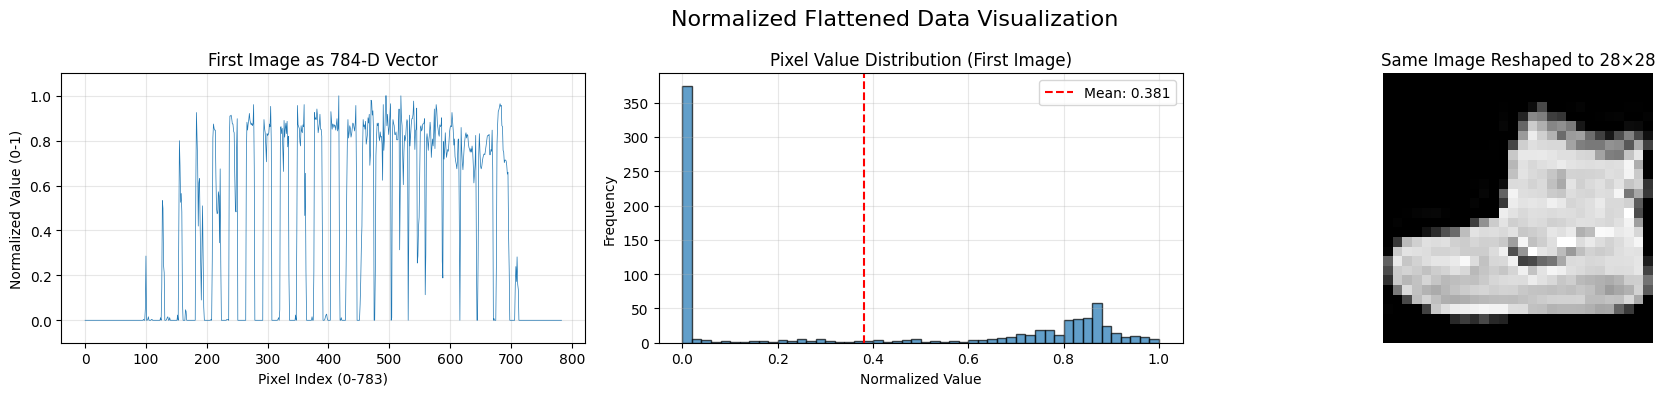

Flattened shape: (60000, 784)
Each image is now a vector of 784 values
Values still normalized between 0.0 and 1.0


In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# 1. Show first image as flattened vector
axes[0].plot(x_train[0], linewidth=0.5)
axes[0].set_title('First Image as 784-D Vector')
axes[0].set_xlabel('Pixel Index (0-783)')
axes[0].set_ylabel('Normalized Value (0-1)')
axes[0].set_ylim(-0.1, 1.1)
axes[0].grid(True, alpha=0.3)

# 2. Histogram of pixel values
axes[1].hist(x_train[0], bins=50, edgecolor='black', alpha=0.7)
axes[1].set_title('Pixel Value Distribution (First Image)')
axes[1].set_xlabel('Normalized Value')
axes[1].set_ylabel('Frequency')
axes[1].axvline(x_train[0].mean(), color='red', linestyle='--', label=f'Mean: {x_train[0].mean():.3f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. Heatmap visualization of flattened image
axes[2].imshow(x_train[0].reshape(28, 28), cmap='gray')
axes[2].set_title('Same Image Reshaped to 28×28')
axes[2].axis('off')

plt.suptitle('Normalized Flattened Data Visualization', fontsize=16)
plt.tight_layout()
plt.show()

print(f"Flattened shape: {x_train.shape}")
print(f"Each image is now a vector of {x_train.shape[1]} values")
print(f"Values still normalized between {x_train.min()} and {x_train.max()}")

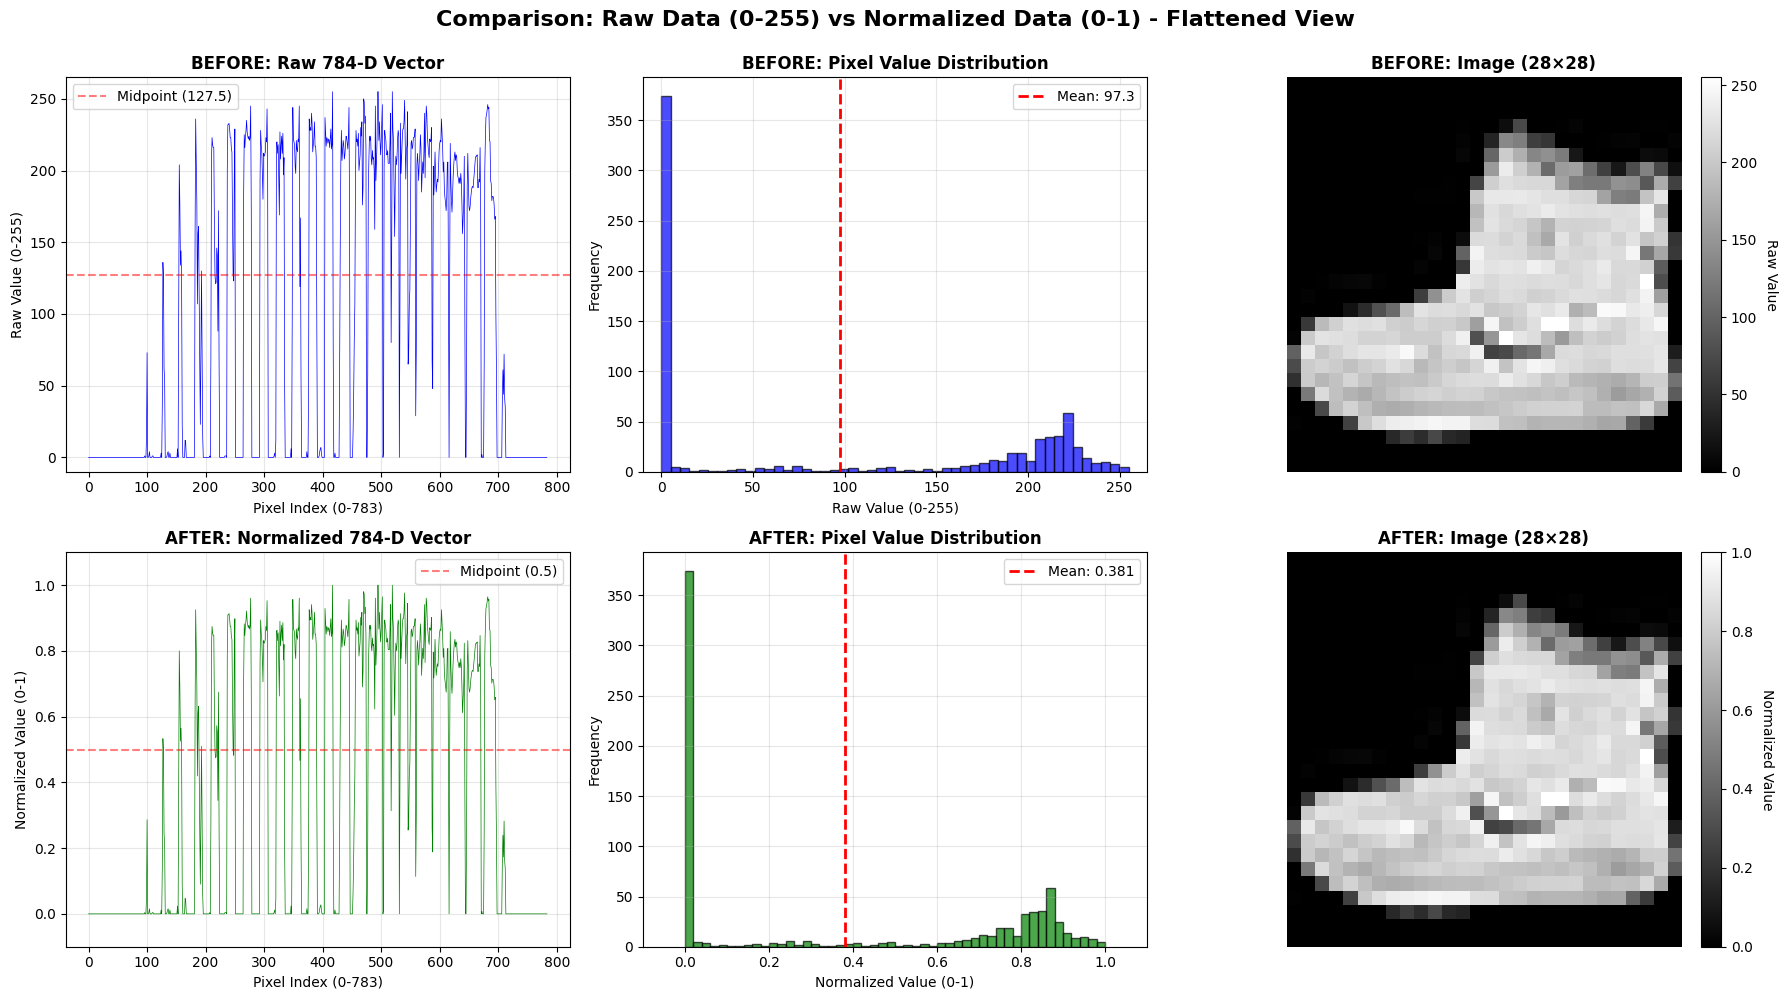

COMPARISON: RAW vs NORMALIZED DATA (Flattened)

RAW DATA (BEFORE Normalization):
  Shape: (60000, 784)
  Data type: uint8
  Value range: [0, 255]
  Mean: 72.94
  Std: 90.02

NORMALIZED DATA (AFTER Normalization):
  Shape: (60000, 784)
  Data type: float32
  Value range: [0.0000, 1.0000]
  Mean: 0.2860
  Std: 0.3530

TRANSFORMATION APPLIED:
  Formula: normalized_value = raw_value / 255.0
  Example: pixel value 255 → 1.0
  Example: pixel value 127 → 0.4980
  Example: pixel value 0 → 0.0

COMPARISON FOR FIRST IMAGE:
  Raw min: 0
  Normalized min: 0.0000
  ---
  Raw max: 255
  Normalized max: 1.0000
  ---
  Raw mean: 97.25
  Normalized mean: 0.3814
  Ratio: 255.00x



In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Load raw data again for comparison
from keras.datasets import fashion_mnist
(x_raw, _), (_, _) = fashion_mnist.load_data()

# Flatten raw data for comparison
x_raw_flat = x_raw.reshape((len(x_raw), np.prod(x_raw.shape[1:])))

# Create figure with 2 rows (before/after) and 3 columns (vector/histogram/image)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

img_idx = 0  # Image to visualize

# ==================== ROW 1: RAW DATA (BEFORE NORMALIZATION) ====================

# 1.1 Raw data as vector
axes[0, 0].plot(x_raw_flat[img_idx], linewidth=0.5, color='blue')
axes[0, 0].set_title('BEFORE: Raw 784-D Vector', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Pixel Index (0-783)')
axes[0, 0].set_ylabel('Raw Value (0-255)')
axes[0, 0].set_ylim(-10, 265)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axhline(y=127.5, color='red', linestyle='--', alpha=0.5, label='Midpoint (127.5)')
axes[0, 0].legend()

# 1.2 Raw data histogram
axes[0, 1].hist(x_raw_flat[img_idx], bins=50, edgecolor='black', alpha=0.7, color='blue')
axes[0, 1].set_title('BEFORE: Pixel Value Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Raw Value (0-255)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(x_raw_flat[img_idx].mean(), color='red', linestyle='--',
                   linewidth=2, label=f'Mean: {x_raw_flat[img_idx].mean():.1f}')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlim(-10, 265)

# 1.3 Raw data as image
im1 = axes[0, 2].imshow(x_raw[img_idx], cmap='gray', vmin=0, vmax=255)
axes[0, 2].set_title('BEFORE: Image (28×28)', fontsize=12, fontweight='bold')
axes[0, 2].axis('off')
cbar1 = plt.colorbar(im1, ax=axes[0, 2], fraction=0.046, pad=0.04)
cbar1.set_label('Raw Value', rotation=270, labelpad=15)

# ==================== ROW 2: NORMALIZED DATA (AFTER NORMALIZATION) ====================

# 2.1 Normalized data as vector
axes[1, 0].plot(x_train[img_idx], linewidth=0.5, color='green')
axes[1, 0].set_title('AFTER: Normalized 784-D Vector', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Pixel Index (0-783)')
axes[1, 0].set_ylabel('Normalized Value (0-1)')
axes[1, 0].set_ylim(-0.1, 1.1)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Midpoint (0.5)')
axes[1, 0].legend()

# 2.2 Normalized data histogram
axes[1, 1].hist(x_train[img_idx], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1, 1].set_title('AFTER: Pixel Value Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Normalized Value (0-1)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].axvline(x_train[img_idx].mean(), color='red', linestyle='--',
                   linewidth=2, label=f'Mean: {x_train[img_idx].mean():.3f}')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim(-0.1, 1.1)

# 2.3 Normalized data as image
im2 = axes[1, 2].imshow(x_train[img_idx].reshape(28, 28), cmap='gray', vmin=0, vmax=1)
axes[1, 2].set_title('AFTER: Image (28×28)', fontsize=12, fontweight='bold')
axes[1, 2].axis('off')
cbar2 = plt.colorbar(im2, ax=axes[1, 2], fraction=0.046, pad=0.04)
cbar2.set_label('Normalized Value', rotation=270, labelpad=15)

# Overall title
fig.suptitle('Comparison: Raw Data (0-255) vs Normalized Data (0-1) - Flattened View',
             fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()


# ==================== DETAILED STATISTICS ====================
print("="*70)
print("COMPARISON: RAW vs NORMALIZED DATA (Flattened)")
print("="*70)

print("\nRAW DATA (BEFORE Normalization):")
print(f"  Shape: {x_raw_flat.shape}")
print(f"  Data type: {x_raw_flat.dtype}")
print(f"  Value range: [{x_raw_flat.min()}, {x_raw_flat.max()}]")
print(f"  Mean: {x_raw_flat.mean():.2f}")
print(f"  Std: {x_raw_flat.std():.2f}")

print("\nNORMALIZED DATA (AFTER Normalization):")
print(f"  Shape: {x_train.shape}")
print(f"  Data type: {x_train.dtype}")
print(f"  Value range: [{x_train.min():.4f}, {x_train.max():.4f}]")
print(f"  Mean: {x_train.mean():.4f}")
print(f"  Std: {x_train.std():.4f}")

print("\nTRANSFORMATION APPLIED:")
print(f"  Formula: normalized_value = raw_value / 255.0")
print(f"  Example: pixel value 255 → {255/255.0}")
print(f"  Example: pixel value 127 → {127/255.0:.4f}")
print(f"  Example: pixel value 0 → {0/255.0}")

print("\nCOMPARISON FOR FIRST IMAGE:")
print(f"  Raw min: {x_raw_flat[img_idx].min()}")
print(f"  Normalized min: {x_train[img_idx].min():.4f}")
print(f"  ---")
print(f"  Raw max: {x_raw_flat[img_idx].max()}")
print(f"  Normalized max: {x_train[img_idx].max():.4f}")
print(f"  ---")
print(f"  Raw mean: {x_raw_flat[img_idx].mean():.2f}")
print(f"  Normalized mean: {x_train[img_idx].mean():.4f}")
print(f"  Ratio: {x_raw_flat[img_idx].mean() / x_train[img_idx].mean():.2f}x")

print("\n" + "="*70)

### Building the Autoencoder Architecture

In [10]:
import keras
from keras import layers

encoding_dim = 32  # Size of our encoded representations

# INPUT
input_img = keras.Input(shape=(x_train.shape[1],), name='input')

# ENCODER (save each layer)
encoder_layer1 = layers.Dense(256, activation='relu', name='encoder_1')
encoder_layer2 = layers.Dense(128, activation='relu', name='encoder_2')
encoder_layer3 = layers.Dense(encoding_dim, activation='relu', name='encoder_bottleneck')

encoded = encoder_layer1(input_img)
encoded = encoder_layer2(encoded)
encoded = encoder_layer3(encoded)

# DECODER (save each layer)
decoder_layer1 = layers.Dense(128, activation='relu', name='decoder_1')
decoder_layer2 = layers.Dense(256, activation='relu', name='decoder_2')
decoder_layer3 = layers.Dense(x_train.shape[1], activation='sigmoid', name='decoder_output')

decoded = decoder_layer1(encoded)
decoded = decoder_layer2(decoded)
decoded = decoder_layer3(decoded)

# AUTOENCODER
autoencoder = keras.Model(input_img, decoded, name='autoencoder')
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

print("="*70)
print("AUTOENCODER MODEL")
print("="*70)
autoencoder.summary()

# CREATE SEPARATE ENCODER
encoder = keras.Model(input_img, encoded, name='encoder')
print("\n" + "="*70)
print("ENCODER MODEL")
print("="*70)
encoder.summary()

# CREATE SEPARATE DECODER
latent_input = keras.Input(shape=(encoding_dim,), name='latent_input')
decoded_output = decoder_layer1(latent_input)
decoded_output = decoder_layer2(decoded_output)
decoded_output = decoder_layer3(decoded_output)

decoder = keras.Model(latent_input, decoded_output, name='decoder')
print("\n" + "="*70)
print("DECODER MODEL")
print("="*70)
decoder.summary()

print("\nAll models created successfully!")
print("   Now you can train the autoencoder and use encoder/decoder separately")

AUTOENCODER MODEL


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_1 (Dense)               │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_2 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_bottleneck (Dense)      │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_1 (Dense)               │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_2 (Dense)               │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_output (Dense)          │ (None, 784)            │       201,488 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 476,720 (1.82 MB)

 Trainable params: 476,720 (1.82 MB)

 Non-trainable params: 0 (0.00 B)


ENCODER MODEL


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_1 (Dense)               │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_2 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_bottleneck (Dense)      │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 237,984 (929.62 KB)

 Trainable params: 237,984 (929.62 KB)

 Non-trainable params: 0 (0.00 B)


DECODER MODEL


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ latent_input (InputLayer)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_1 (Dense)               │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_2 (Dense)               │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_output (Dense)          │ (None, 784)            │       201,488 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,736 (932.56 KB)

 Trainable params: 238,736 (932.56 KB)

 Non-trainable params: 0 (0.00 B)


All models created successfully!
   Now you can train the autoencoder and use encoder/decoder separately


#### Architecture Breakdown

This autoencoder uses a **symmetrical encoder-decoder structure** with a **32-dimensional bottleneck** (latent space).

| Layer | Type | Input Dim | Output Dim | Activation | Purpose |
|-------|------|-----------|------------|------------|---------|
| **Input** | Input | - | 784 | - | Original flattened image |
| **Encoder 1** | Dense | 784 | 256 | ReLU | First compression |
| **Encoder 2** | Dense | 256 | 128 | ReLU | Further compression |
| **Encoder 3 (Bottleneck)** | Dense | 128 | **32** | ReLU | **Latent representation** |
| **Decoder 1** | Dense | 32 | 128 | ReLU | Start reconstruction |
| **Decoder 2** | Dense | 128 | 256 | ReLU | Continue expansion |
| **Decoder 3 (Output)** | Dense | 256 | 784 | Sigmoid | Final reconstructed image |

---

**Architecture Flow**
```
Input Image (784D)
      ↓
[Encoder Layer 1] → 256 neurons (ReLU)
      ↓
[Encoder Layer 2] → 128 neurons (ReLU)
      ↓
[BOTTLENECK/LATENT SPACE] → 32 neurons (ReLU)
      ↓
[Decoder Layer 1] → 128 neurons (ReLU)
      ↓
[Decoder Layer 2] → 256 neurons (ReLU)
      ↓
[Output Layer] → 784 neurons (Sigmoid)
      ↓
Reconstructed Image (784D)
```

**Compression Ratio:** 784 / 32 = **24.5x compression**

---

**Key Design Decisions**

1. **Encoding Dimension = 32**
- Compresses 784 dimensions → 32 dimensions
- Forces network to learn most important features
- Too small: loses information; Too large: doesn't compress enough
<br>

2. **Symmetrical Architecture**
```
Encoder:  784 → 256 → 128 → 32
Decoder:                    32 → 128 → 256 → 784
```
- Mirror structure helps reconstruction
- Gradual compression and expansion prevents information loss
<br>

3. **Activation Functions**<br>
**ReLU (Rectified Linear Unit)** for hidden layers:
- Formula: $$f(x) = \max(0, x)$$
- Helps with gradient flow during backpropagation
- Introduces non-linearity
- Fast computation<br><br>
**Sigmoid** for output layer:
- Formula: $$\sigma(x) = \frac{1}{1 + e^{-x}}$$
- Output range: [0, 1]
- Matches normalized input range [0, 1]
- Interprets each pixel as probability
<br>

4. **Loss Function: Binary Cross-Entropy**
- Appropriate for pixel values in [0, 1]
- Treats each pixel independently
- Formula per pixel:

$$\mathcal{L} = -[y \log(\hat{y} ) + (1-y)\log(1-\hat{y} )]$$

- Better than MSE for images normalized to [0, 1]
<br>

5. **Optimizer: Adam**
- Adaptive learning rate
- Combines benefits of RMSprop and Momentum
- Generally works well for most problems
- Default learning rate: 0.001

---

**Parameter Count Calculation**

**Encoder Layers:**
- **Layer 1:** (784 × 256) + 256 bias = **200,960 parameters**
- **Layer 2:** (256 × 128) + 128 bias = **32,896 parameters**
- **Layer 3:** (128 × 32) + 32 bias = **4,128 parameters**

**Decoder Layers:**
- **Layer 4:** (32 × 128) + 128 bias = **4,224 parameters**
- **Layer 5:** (128 × 256) + 256 bias = **33,024 parameters**
- **Layer 6:** (256 × 784) + 784 bias = **201,488 parameters**

**Total Trainable Parameters: 476,720**

*Formula: (input_dim × output_dim) + output_dim (bias)*

---

**What This Autoencoder Learns**

1. **Dimensionality Reduction:** Compresses high-dimensional images into compact 32D representation
2. **Feature Extraction:** Automatically learns important features (edges, shapes, patterns)
3. **Data Reconstruction:** Learns to decode compressed representation back to original
4. **Unsupervised Learning:** No labels needed - learns data structure itself

---

**Training Strategy**

**Self-Supervised Learning:**
- Input = Target (both are `x_train`)
- Network learns identity function: `f(x) ≈ x`
- Bottleneck forces meaningful compression
- Loss measures reconstruction error

---

### Training the Autoencoder

In [11]:
autoencoder.fit(x_train, x_train,                # Notice: input = output (self-supervised - no labels needed)

                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test) # monitors performance on unseen data. Helps detect overfitting
                )

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.4331 - val_loss: 0.3127
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3067 - val_loss: 0.3001
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2965 - val_loss: 0.2957
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2916 - val_loss: 0.2906
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2882 - val_loss: 0.2880
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2852 - val_loss: 0.2859
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2830 - val_loss: 0.2846
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2816 - val_loss: 0.2833
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2802 - val_loss: 0.2830
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2797 - val_loss: 0.2812


### Encode (Stores the compressed representations)
This line does 3 things:<br>
1. Takes the test images (x_test)
2. Passes them through the encoder model
3. Stores the compressed representations in encoded_imgs

```
encoded_imgs = encoder.predict(x_test, verbose=1)
     ↑            ↑        ↑      ↑        ↑
     |            |        |      |        |
  Result      Model    Method  Input   Show progress
  variable    name             data    (1=yes, 0=no)
```

---

**What Happens Step-by-Step**

**Before:**
```
x_test = 10,000 test images
Each image = 784 dimensions (28×28 pixels flattened)
Shape: (10000, 784)
```

**Process:**
```
encoder.predict(x_test) means:
  "Take all 10,000 images and encode each one"
  
For each image:
  784 pixels → Dense(256) → Dense(128) → Dense(32)
  Result: 32 numbers (compressed representation)
```

**After:**
```
encoded_imgs = compressed version of all 10,000 images
Each encoded image = 32 dimensions
Shape: (10000, 32)
```

---

**Visual Representation**
```
BEFORE encoding:
┌─────────────────────────────────────────────┐
│ x_test[0]: [0.2, 0.5, 0.1, ... 784 numbers] │
│ x_test[1]: [0.3, 0.7, 0.0, ... 784 numbers] │
│ x_test[2]: [0.1, 0.4, 0.9, ... 784 numbers] │
│ ...                                         │
│ x_test[9999]: [... 784 numbers]             │
└─────────────────────────────────────────────┘
          784 dimensions each

              ⬇ encoder.predict() ⬇

AFTER encoding:
┌─────────────────────────────────────────────┐
│ encoded_imgs[0]: [0.8, 0.2, ... 32 numbers] │
│ encoded_imgs[1]: [0.5, 0.9, ... 32 numbers] │  
│ encoded_imgs[2]: [0.1, 0.7, ... 32 numbers] │
│ ...                                         │
│ encoded_imgs[9999]: [... 32 numbers]        │
└─────────────────────────────────────────────┘
        32 dimensions each

In [12]:
# Encode
encoded_imgs = encoder.predict(x_test, verbose=1)
print(f"Encoded: {x_test.shape} → {encoded_imgs.shape}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Encoded: (10000, 784) → (10000, 32)


#### Encoder Visualization
```# Let's say encoded_imgs[1] contains these 32 numbers:
encoded = np.array([
    0.8, 0.2, 0.5, 0.1, 0.9, 0.3, 0.7, 0.4,
    0.6, 0.1, 0.8, 0.2, 0.5, 0.9, 0.3, 0.7,
    0.4, 0.6, 0.1, 0.8, 0.2, 0.5, 0.9, 0.3,
    0.7, 0.4, 0.6, 0.1, 0.8, 0.2, 0.5, 0.9
])
# Shape: (32,) - just a 1D array

# reshape((1, 32)).T gives shape (32, 1)
reshaped = encoded.reshape((1, 32)).T

Result:
    [0.8]
    [0.2]
    [0.5]
    [0.1]
    [0.9]
    ...
    [0.9]
    
This creates a VERTICAL BAR with 32 pixels
(very thin and tall - hard to see details)
```

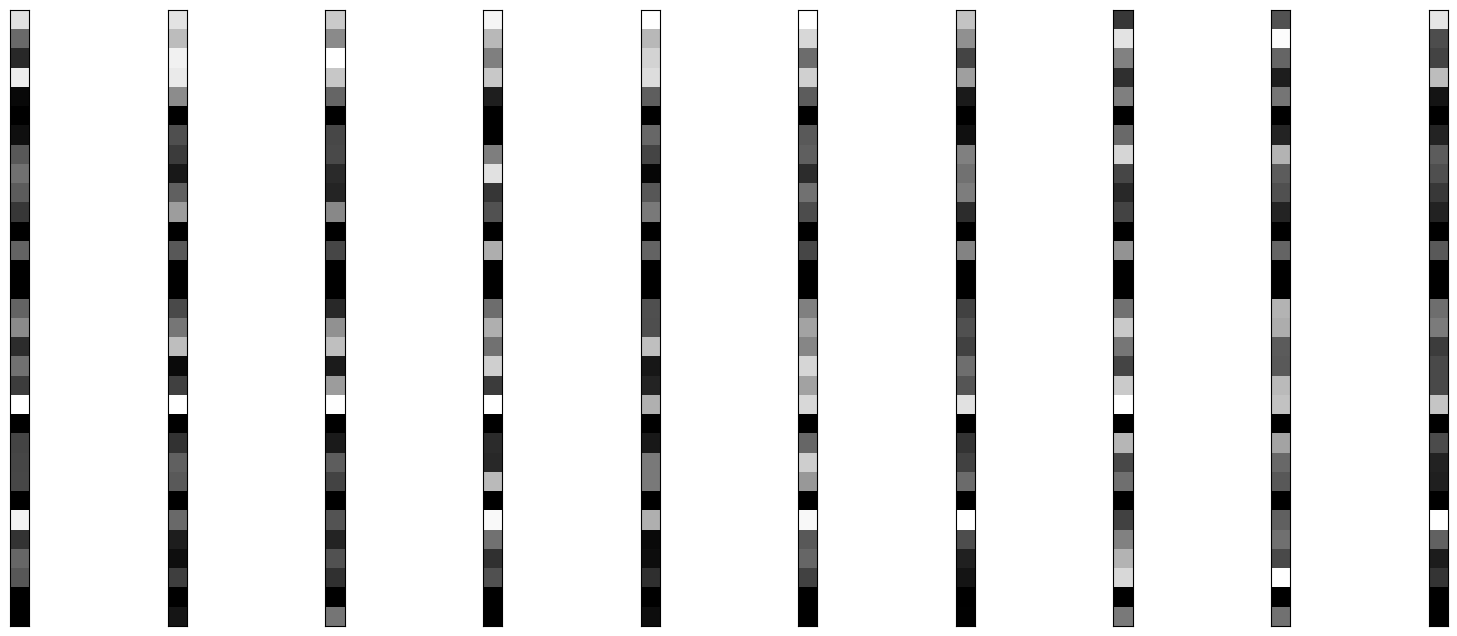

In [13]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((1, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


### Decode
This line does 3 things:<br>
1. Takes the compressed representations (encoded_imgs)
2. Passes them through the decoder model
3. Stores the reconstructed images in decoded_imgs

```
decoded_imgs = decoder.predict(encoded_imgs, verbose=0)
     ↑            ↑        ↑        ↑          ↑
     |            |        |        |          |
  Result      Model    Method  Compressed   Silent mode
  variable    name             data         (no progress bar)
```

---

**What Happens Step-by-Step**

**Before:**
```
encoded_imgs = 10,000 compressed representations
Each compressed = 32 dimensions
Shape: (10000, 32)
```

**Process:**
```
decoder.predict(encoded_imgs) means:
  "Take all 10,000 compressed representations and decode each one back to an image"
  
For each compressed representation:
  32 numbers → Dense(128) → Dense(256) → Dense(784)
  Result: 784 numbers (reconstructed image)
```

**After:**
```
decoded_imgs = reconstructed version of all 10,000 images
Each decoded image = 784 dimensions (28×28 pixels)
Shape: (10000, 784)
```

---

**Visual Representation**
```
BEFORE decoding (compressed):
┌─────────────────────────────────────────────┐
│ encoded_imgs[0]: [0.8, 0.2, ... 32 numbers] │
│ encoded_imgs[1]: [0.5, 0.9, ... 32 numbers] │  
│ encoded_imgs[2]: [0.1, 0.7, ... 32 numbers] │
│ ...                                         │
│ encoded_imgs[9999]: [... 32 numbers]        │
└─────────────────────────────────────────────┘
        32 dimensions each

              ⬇ decoder.predict() ⬇

AFTER decoding (reconstructed):
┌───────────────────────────────────────────────────┐
│ decoded_imgs[0]: [0.2, 0.5, 0.1, ... 784 numbers] │
│ decoded_imgs[1]: [0.3, 0.7, 0.0, ... 784 numbers] │
│ decoded_imgs[2]: [0.1, 0.4, 0.9, ... 784 numbers] │
│ ...                                               │
│ decoded_imgs[9999]: [... 784 numbers]             │
└───────────────────────────────────────────────────┘
          784 dimensions each

In [14]:
# Decode
decoded_imgs = decoder.predict(encoded_imgs, verbose=0)
print(f"Decoded: {encoded_imgs.shape} → {decoded_imgs.shape}")

Decoded: (10000, 32) → (10000, 784)


#### Decoder Visualization

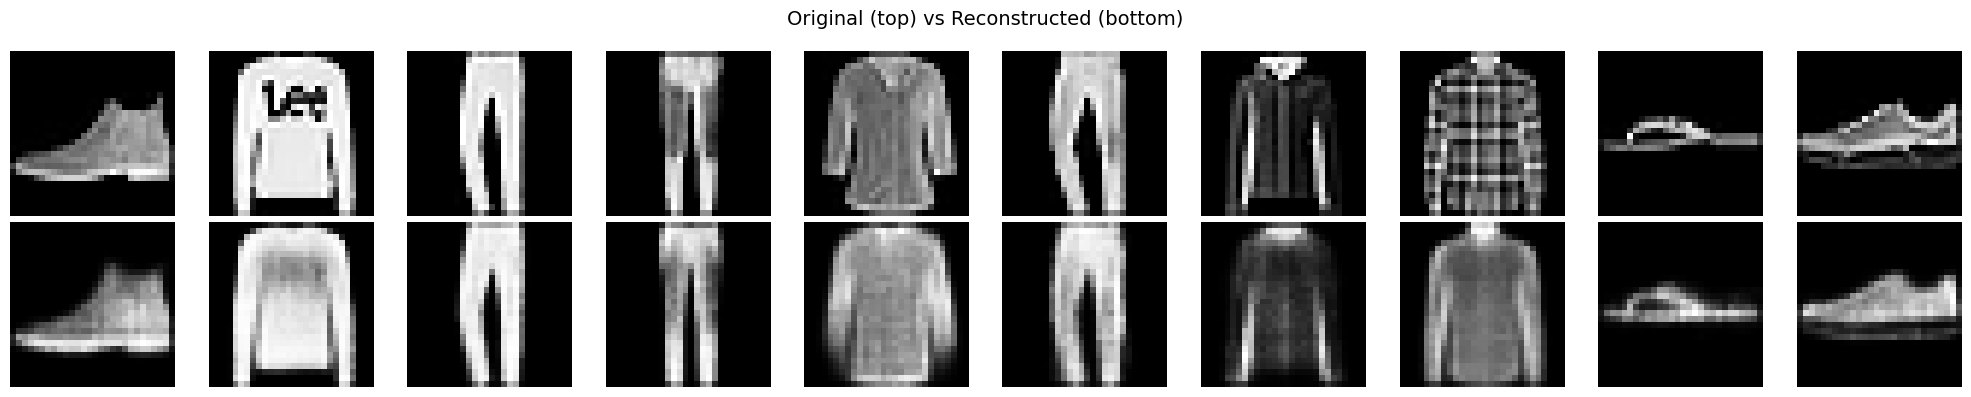


Reconstruction Error: 0.012381


In [15]:
# Visualize
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

plt.suptitle('Original (top) vs Reconstructed (bottom)', fontsize=14)
plt.tight_layout()
plt.show()

print(f"\nReconstruction Error: {np.mean(np.square(x_test - decoded_imgs)):.6f}")

### Summary

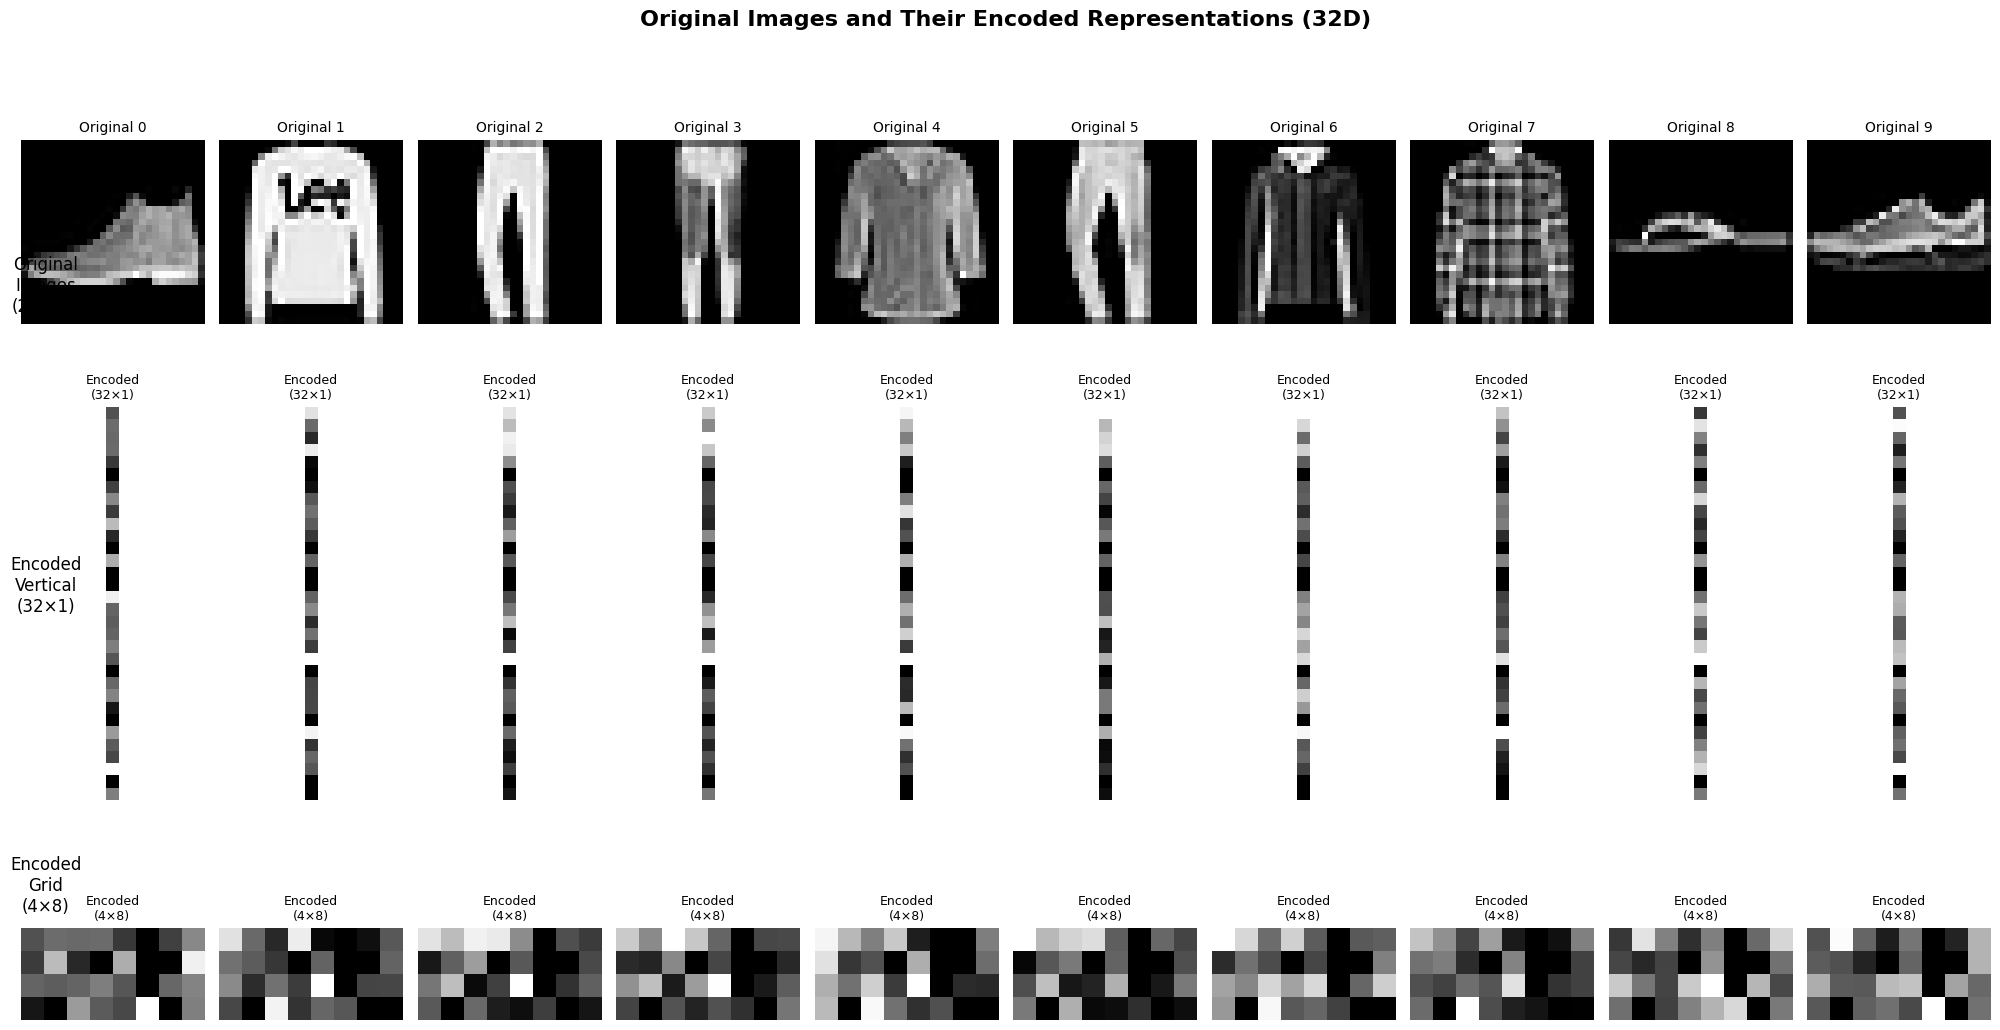


DETAILED ANALYSIS OF ONE ENCODED IMAGE

Original image index: 0
Original shape: (784,)
Encoded shape: (32,)

Encoded values (first 10 of 32):
[ 4.7128987  6.2106223  6.109015   6.1452193  3.256778   0.
  3.7137775  7.8478827  3.4093966 10.761252 ]

Encoded statistics:
  Min: 0.0000
  Max: 14.7024
  Mean: 5.0835
  Std: 3.8721
  Non-zero values: 25/32


In [16]:
import matplotlib.pyplot as plt
import numpy as np

n = 10  # Number of images to display

# Create figure with 3 rows
fig = plt.figure(figsize=(20, 12))

for i in range(n):
    # Row 1: Original image
    ax1 = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Original {i}', fontsize=10)
    ax1.axis('off')

    # Row 2: Encoded as vertical bar (current code's approach)
    ax2 = plt.subplot(3, n, i + n + 1)
    plt.imshow(encoded_imgs[i].reshape((32, 1)), cmap='gray')
    plt.title(f'Encoded\n(32×1)', fontsize=9)
    ax2.axis('off')

    # Row 3: Encoded as 4×8 grid (better visualization)
    ax3 = plt.subplot(3, n, i + 2*n + 1)
    plt.imshow(encoded_imgs[i].reshape((4, 8)), cmap='gray')
    plt.title(f'Encoded\n(4×8)', fontsize=9)
    ax3.axis('off')

# Add row labels
fig.text(0.02, 0.75, 'Original\nImages\n(28×28)',
         fontsize=12, ha='center', va='center', rotation=0)
fig.text(0.02, 0.50, 'Encoded\nVertical\n(32×1)',
         fontsize=12, ha='center', va='center', rotation=0)
fig.text(0.02, 0.25, 'Encoded\nGrid\n(4×8)',
         fontsize=12, ha='center', va='center', rotation=0)

plt.suptitle('Original Images and Their Encoded Representations (32D)',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Step 4: Analyze one encoded representation
print("\n" + "="*70)
print("DETAILED ANALYSIS OF ONE ENCODED IMAGE")
print("="*70)

img_idx = 0
print(f"\nOriginal image index: {img_idx}")
print(f"Original shape: {x_test[img_idx].shape}")
print(f"Encoded shape: {encoded_imgs[img_idx].shape}")
print(f"\nEncoded values (first 10 of 32):")
print(encoded_imgs[img_idx][:10])
print(f"\nEncoded statistics:")
print(f"  Min: {encoded_imgs[img_idx].min():.4f}")
print(f"  Max: {encoded_imgs[img_idx].max():.4f}")
print(f"  Mean: {encoded_imgs[img_idx].mean():.4f}")
print(f"  Std: {encoded_imgs[img_idx].std():.4f}")
print(f"  Non-zero values: {np.count_nonzero(encoded_imgs[img_idx])}/32")

CREATING DECODER WITH INTERMEDIATE LAYER VISUALIZATION

Autoencoder layers:
   Layer 0: input                     | Output Shape: (None, 784)
   Layer 1: encoder_1                 | Output Shape: (None, 256)
   Layer 2: encoder_2                 | Output Shape: (None, 128)
   Layer 3: encoder_bottleneck        | Output Shape: (None, 32)
   Layer 4: decoder_1                 | Output Shape: (None, 128)
   Layer 5: decoder_2                 | Output Shape: (None, 256)
   Layer 6: decoder_output            | Output Shape: (None, 784)

Decoder Layers Extracted:
   Layer 1: decoder_1                 - Output: 128
   Layer 2: decoder_2                 - Output: 256
   Layer 3: decoder_output            - Output: 784

Decoder Stage Models Created:
   Stage 1: 32 → 128 dimensions
   Stage 2: 32 → 256 dimensions
   Stage 3: 32 → 784 dimensions (final)

GENERATING INTERMEDIATE DECODER REPRESENTATIONS

Encoded 10000 test images
   Shape: (10000, 32)

Generated intermediate representations:
   Sta

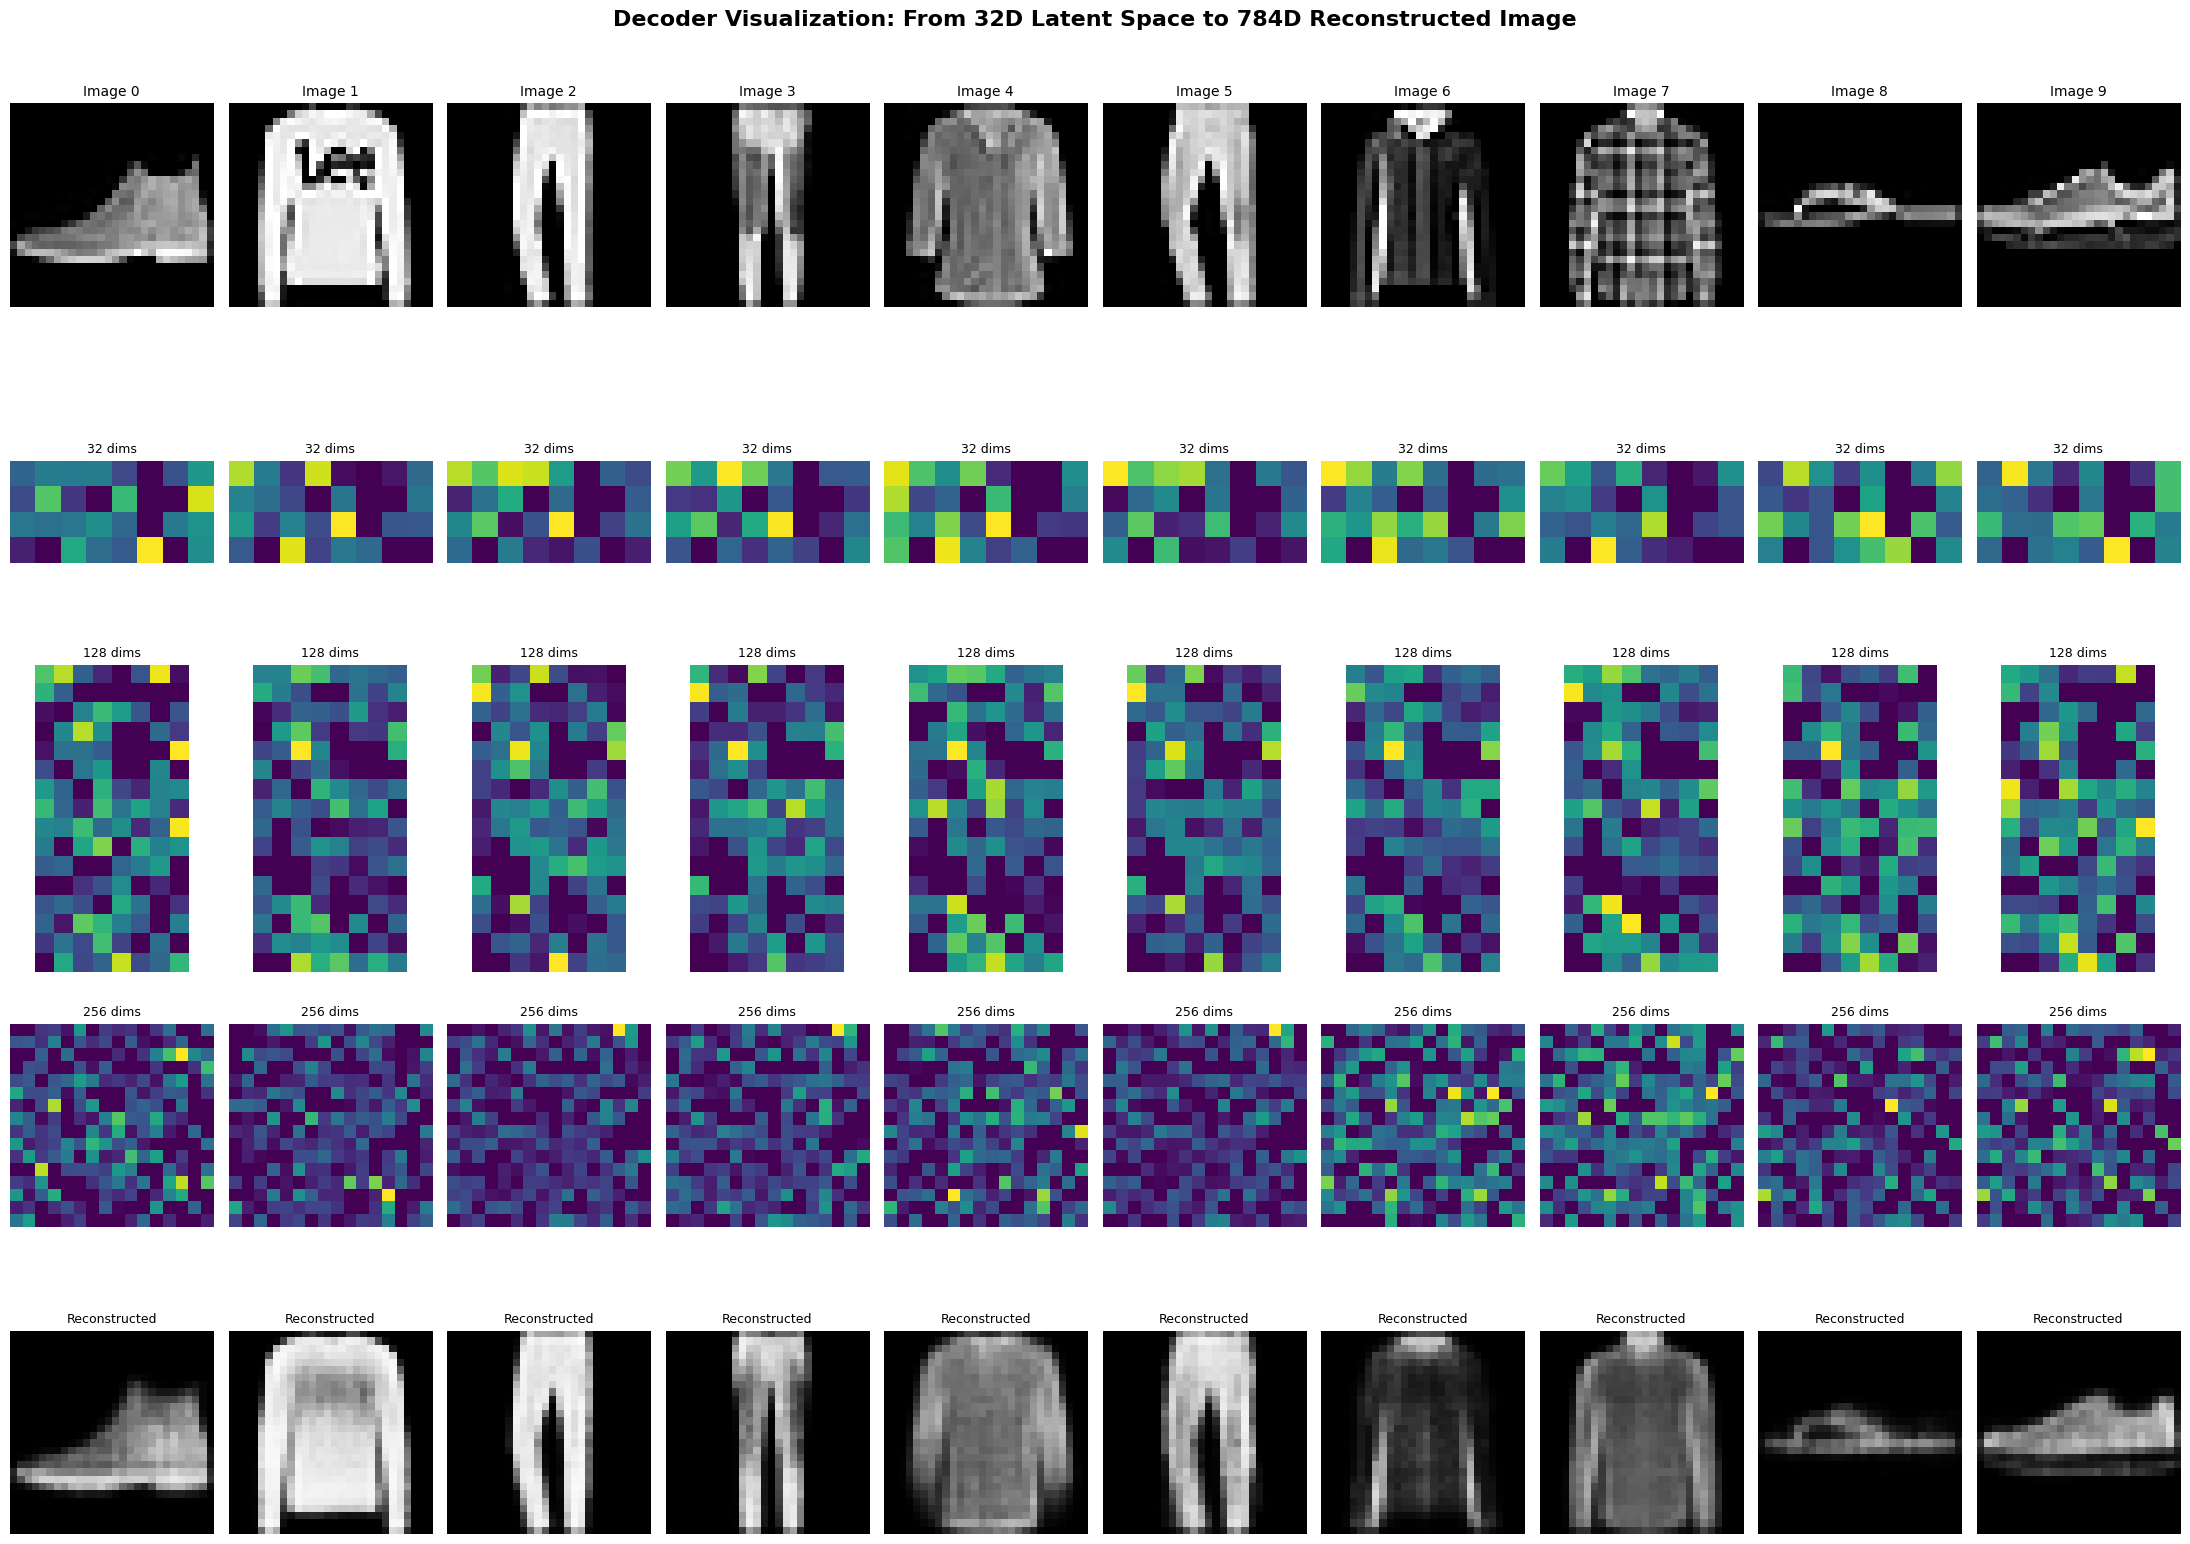


✓ Visualization complete!

DETAILED DECODER ANALYSIS FOR ONE IMAGE

Image Index: 0

Decoder Expansion Process:
  1. Encoded:             32 dimensions
  2. After Layer 1:      128 dimensions (×4.0 expansion)
  3. After Layer 2:      256 dimensions (×2.0 expansion)
  4. Final Output:       784 dimensions (×3.1 expansion)

Total Expansion: 32 → 784 (×24.5)

Statistics at Each Stage:
  Encoded (32D):
    - Mean:  5.0835
    - Std:   3.8721
    - Range: [ 0.0000, 14.7024]

  After Layer 1 (128D):
    - Mean:  3.2270
    - Std:   2.8558
    - Range: [ 0.0000, 10.6056]

  After Layer 2 (256D):
    - Mean:  2.7627
    - Std:   2.9793
    - Range: [ 0.0000, 14.0536]

  Final Output (784D):
    - Mean:  0.1710
    - Std:   0.2642
    - Range: [ 0.0000,  0.9034]

Reconstruction Quality:
  - Mean Squared Error (MSE): 0.005442
  - Mean Absolute Error (MAE): 0.037126
  - Correlation: 0.9621

ANALYSIS COMPLETE


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import keras

# ==================== STEP 1: Create Decoder with Intermediate Outputs ====================
print("="*70)
print("CREATING DECODER WITH INTERMEDIATE LAYER VISUALIZATION")
print("="*70)

# First, let's verify the autoencoder structure
print("\nAutoencoder layers:")
for idx, layer in enumerate(autoencoder.layers):
    # Handle InputLayer which doesn't have output_shape in some Keras versions
    try:
        shape = layer.output_shape
    except AttributeError:
        shape = layer.output.shape if hasattr(layer, 'output') else 'N/A'
    print(f"   Layer {idx}: {layer.name:25s} | Output Shape: {shape}")

# Get the decoder layers from the trained autoencoder
# Based on your architecture:
# Layer 0: input
# Layer 1: encoder_1 (256)
# Layer 2: encoder_2 (128)
# Layer 3: encoder_bottleneck (32)
# Layer 4: decoder_1 (128)  <-- First decoder layer
# Layer 5: decoder_2 (256)  <-- Second decoder layer
# Layer 6: decoder_output (784)  <-- Output layer

decoder_layer1 = autoencoder.layers[4]  # Dense(128) - First decoder layer
decoder_layer2 = autoencoder.layers[5]  # Dense(256) - Second decoder layer
decoder_layer3 = autoencoder.layers[6]  # Dense(784) - Output layer

print("\nDecoder Layers Extracted:")
print(f"   Layer 1: {decoder_layer1.name:25s} - Output: 128")
print(f"   Layer 2: {decoder_layer2.name:25s} - Output: 256")
print(f"   Layer 3: {decoder_layer3.name:25s} - Output: 784")

# Create models to get intermediate outputs
latent_input = keras.Input(shape=(encoding_dim,), name='latent_input')

# Build decoder with intermediate outputs
decoded_layer1_output = decoder_layer1(latent_input)  # 32 → 128
decoded_layer2_output = decoder_layer2(decoded_layer1_output)  # 128 → 256
decoded_layer3_output = decoder_layer3(decoded_layer2_output)  # 256 → 784

# Create models for each stage
decoder_stage1 = keras.Model(latent_input, decoded_layer1_output, name='decoder_stage1')
decoder_stage2 = keras.Model(latent_input, decoded_layer2_output, name='decoder_stage2')
decoder_full = keras.Model(latent_input, decoded_layer3_output, name='decoder_full')

print("\nDecoder Stage Models Created:")
print(f"   Stage 1: 32 → 128 dimensions")
print(f"   Stage 2: 32 → 256 dimensions")
print(f"   Stage 3: 32 → 784 dimensions (final)")

# ==================== STEP 2: Get Intermediate Representations ====================
print("\n" + "="*70)
print("GENERATING INTERMEDIATE DECODER REPRESENTATIONS")
print("="*70)

# First, get encoded representations
encoded_imgs = encoder.predict(x_test, verbose=0)
print(f"\nEncoded {len(encoded_imgs)} test images")
print(f"   Shape: {encoded_imgs.shape}")

# Get outputs from each decoder stage
decoded_stage1_imgs = decoder_stage1.predict(encoded_imgs, verbose=0)
decoded_stage2_imgs = decoder_stage2.predict(encoded_imgs, verbose=0)
decoded_final_imgs = decoder_full.predict(encoded_imgs, verbose=0)

print(f"\nGenerated intermediate representations:")
print(f"   Stage 1 (Layer 1): {decoded_stage1_imgs.shape} - 128D")
print(f"   Stage 2 (Layer 2): {decoded_stage2_imgs.shape} - 256D")
print(f"   Final (Output):    {decoded_final_imgs.shape} - 784D")

# Verify dimensions are correct
assert decoded_stage1_imgs.shape[1] == 128, f"Expected 128, got {decoded_stage1_imgs.shape[1]}"
assert decoded_stage2_imgs.shape[1] == 256, f"Expected 256, got {decoded_stage2_imgs.shape[1]}"
assert decoded_final_imgs.shape[1] == 784, f"Expected 784, got {decoded_final_imgs.shape[1]}"
print("\n✓ All dimensions verified correctly!")

# ==================== STEP 3: VISUALIZE THE DECODER PROCESS ====================
print("\n" + "="*70)
print("VISUALIZING DECODER EXPANSION PROCESS")
print("="*70)

n = 10  # Number of images to display

fig = plt.figure(figsize=(22, 16))

for i in range(n):
    # Row 1: Original Image
    ax1 = plt.subplot(5, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray', vmin=0, vmax=1)
    if i == 0:
        plt.ylabel('Original\n(28×28)', fontsize=11, rotation=0, ha='right', va='center')
    plt.title(f'Image {i}', fontsize=10)
    ax1.axis('off')

    # Row 2: Encoded Representation (32D as 4×8 grid)
    ax2 = plt.subplot(5, n, i + n + 1)
    plt.imshow(encoded_imgs[i].reshape(4, 8), cmap='viridis')
    if i == 0:
        plt.ylabel('Encoded\n(32D)\n4×8', fontsize=11, rotation=0, ha='right', va='center')
    plt.title(f'32 dims', fontsize=9)
    ax2.axis('off')

    # Row 3: After Decoder Layer 1 (128D as 16×8 grid)
    ax3 = plt.subplot(5, n, i + 2*n + 1)
    plt.imshow(decoded_stage1_imgs[i].reshape(16, 8), cmap='viridis')
    if i == 0:
        plt.ylabel('Layer 1\n(128D)\n16×8', fontsize=11, rotation=0, ha='right', va='center')
    plt.title(f'128 dims', fontsize=9)
    ax3.axis('off')

    # Row 4: After Decoder Layer 2 (256D as 16×16 grid)
    ax4 = plt.subplot(5, n, i + 3*n + 1)
    plt.imshow(decoded_stage2_imgs[i].reshape(16, 16), cmap='viridis')
    if i == 0:
        plt.ylabel('Layer 2\n(256D)\n16×16', fontsize=11, rotation=0, ha='right', va='center')
    plt.title(f'256 dims', fontsize=9)
    ax4.axis('off')

    # Row 5: Final Output (784D as 28×28 image)
    ax5 = plt.subplot(5, n, i + 4*n + 1)
    plt.imshow(decoded_final_imgs[i].reshape(28, 28), cmap='gray', vmin=0, vmax=1)
    if i == 0:
        plt.ylabel('Output\n(784D)\n28×28', fontsize=11, rotation=0, ha='right', va='center')
    plt.title(f'Reconstructed', fontsize=9)
    ax5.axis('off')

plt.suptitle('Decoder Visualization: From 32D Latent Space to 784D Reconstructed Image',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n✓ Visualization complete!")

# ==================== STEP 4: DETAILED ANALYSIS ====================
print("\n" + "="*70)
print("DETAILED DECODER ANALYSIS FOR ONE IMAGE")
print("="*70)

img_idx = 0

print(f"\nImage Index: {img_idx}")
print(f"\nDecoder Expansion Process:")
print(f"  1. Encoded:           {encoded_imgs[img_idx].shape[0]:4d} dimensions")
print(f"  2. After Layer 1:     {decoded_stage1_imgs[img_idx].shape[0]:4d} dimensions (×4.0 expansion)")
print(f"  3. After Layer 2:     {decoded_stage2_imgs[img_idx].shape[0]:4d} dimensions (×2.0 expansion)")
print(f"  4. Final Output:      {decoded_final_imgs[img_idx].shape[0]:4d} dimensions (×3.1 expansion)")

print(f"\nTotal Expansion: 32 → 784 (×{784/32:.1f})")

print(f"\nStatistics at Each Stage:")
print(f"  Encoded (32D):")
print(f"    - Mean: {encoded_imgs[img_idx].mean():7.4f}")
print(f"    - Std:  {encoded_imgs[img_idx].std():7.4f}")
print(f"    - Range: [{encoded_imgs[img_idx].min():7.4f}, {encoded_imgs[img_idx].max():7.4f}]")

print(f"\n  After Layer 1 (128D):")
print(f"    - Mean: {decoded_stage1_imgs[img_idx].mean():7.4f}")
print(f"    - Std:  {decoded_stage1_imgs[img_idx].std():7.4f}")
print(f"    - Range: [{decoded_stage1_imgs[img_idx].min():7.4f}, {decoded_stage1_imgs[img_idx].max():7.4f}]")

print(f"\n  After Layer 2 (256D):")
print(f"    - Mean: {decoded_stage2_imgs[img_idx].mean():7.4f}")
print(f"    - Std:  {decoded_stage2_imgs[img_idx].std():7.4f}")
print(f"    - Range: [{decoded_stage2_imgs[img_idx].min():7.4f}, {decoded_stage2_imgs[img_idx].max():7.4f}]")

print(f"\n  Final Output (784D):")
print(f"    - Mean: {decoded_final_imgs[img_idx].mean():7.4f}")
print(f"    - Std:  {decoded_final_imgs[img_idx].std():7.4f}")
print(f"    - Range: [{decoded_final_imgs[img_idx].min():7.4f}, {decoded_final_imgs[img_idx].max():7.4f}]")

# Calculate reconstruction error
original = x_test[img_idx]
reconstructed = decoded_final_imgs[img_idx]
mse = np.mean(np.square(original - reconstructed))
mae = np.mean(np.abs(original - reconstructed))

print(f"\nReconstruction Quality:")
print(f"  - Mean Squared Error (MSE): {mse:.6f}")
print(f"  - Mean Absolute Error (MAE): {mae:.6f}")
print(f"  - Correlation: {np.corrcoef(original, reconstructed)[0,1]:.4f}")

print("\n" + "="*70)
print("ANALYSIS COMPLETE")
print("="*70)

## Deep Encoder Decoder

In [18]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

### Data Loading and Preprocessing

In [19]:
# We only need images (x), not labels (_)
# keras.datasets.fashion_mnist.load_data()
(x_train, _), (x_test, _) = fashion_mnist.load_data()
print(x_train.shape)
print(x_test.shape)

# Normalizes pixel values from [0, 255] to [0, 1] by dividing by 255
# Why normalize?
# - Neural networks train better with values in [0, 1] range
# - Prevents gradient explosion/vanishing
# - Makes optimization more stable
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

(60000, 28, 28)
(10000, 28, 28)


### Flatten Data (Reshape)

In [20]:
print(len(x_train))
print(np.prod(x_train.shape[1:]))

60000
784


In [21]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### Building the Autoencoder Architecture

In [22]:
import keras
from keras import layers

encoding_dim = 32  # Size of our encoded representations

# INPUT
input_img = keras.Input(shape=(x_train.shape[1],), name='input')

# ENCODER (save each layer)
encoder_layer1 = layers.Dense(128, activation='relu', name='encoder_1')
encoder_layer2 = layers.Dense(64, activation='relu', name='encoder_2')
encoder_layer3 = layers.Dense(encoding_dim, activation='relu', name='encoder_bottleneck')

encoded = encoder_layer1(input_img)
encoded = encoder_layer2(encoded)
encoded = encoder_layer3(encoded)

# DECODER (save each layer)
decoder_layer1 = layers.Dense(64, activation='relu', name='decoder_1')
decoder_layer2 = layers.Dense(128, activation='relu', name='decoder_2')
decoder_layer3 = layers.Dense(x_train.shape[1], activation='sigmoid', name='decoder_output')

decoded = decoder_layer1(encoded)
decoded = decoder_layer2(decoded)
decoded = decoder_layer3(decoded)

# AUTOENCODER
autoencoder = keras.Model(input_img, decoded, name='autoencoder')
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

print("="*70)
print("AUTOENCODER MODEL")
print("="*70)
autoencoder.summary()

# CREATE SEPARATE ENCODER
encoder = keras.Model(input_img, encoded, name='encoder')
print("\n" + "="*70)
print("ENCODER MODEL")
print("="*70)
encoder.summary()

# CREATE SEPARATE DECODER
latent_input = keras.Input(shape=(encoding_dim,), name='latent_input')
decoded_output = decoder_layer1(latent_input)
decoded_output = decoder_layer2(decoded_output)
decoded_output = decoder_layer3(decoded_output)

decoder = keras.Model(latent_input, decoded_output, name='decoder')
print("\n" + "="*70)
print("DECODER MODEL")
print("="*70)
decoder.summary()

print("\nAll models created successfully!")
print("   Now you can train the autoencoder and use encoder/decoder separately")

AUTOENCODER MODEL


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_1 (Dense)               │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_2 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_bottleneck (Dense)      │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_1 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_2 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_output (Dense)          │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)


ENCODER MODEL


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_1 (Dense)               │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_2 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_bottleneck (Dense)      │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)


DECODER MODEL


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ latent_input (InputLayer)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_1 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_2 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_output (Dense)          │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,568 (435.81 KB)

 Trainable params: 111,568 (435.81 KB)

 Non-trainable params: 0 (0.00 B)


All models created successfully!
   Now you can train the autoencoder and use encoder/decoder separately


### Training the Autoencoder

In [23]:
autoencoder.fit(x_train, x_train,                # Notice: input = output (self-supervised - no labels needed)
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test) # monitors performance on unseen data. Helps detect overfitting
                )

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.4674 - val_loss: 0.3200
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3140 - val_loss: 0.3069
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3032 - val_loss: 0.3012
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2984 - val_loss: 0.2975
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2950 - val_loss: 0.2950
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2924 - val_loss: 0.2929
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2904 - val_loss: 0.2911
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2883 - val_loss: 0.2896
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2874 - val_loss: 0.2883
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2859 - val_loss: 0.2874
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2843 - val_loss: 0.2870
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/ste

### Encode

In [24]:
# Encode
encoded_imgs = encoder.predict(x_test, verbose=1)
print(f"Encoded: {x_test.shape} → {encoded_imgs.shape}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Encoded: (10000, 784) → (10000, 32)


### Decode

In [25]:
# Decode
decoded_imgs = decoder.predict(encoded_imgs, verbose=0)
print(f"Decoded: {encoded_imgs.shape} → {decoded_imgs.shape}")

Decoded: (10000, 32) → (10000, 784)


### Compare

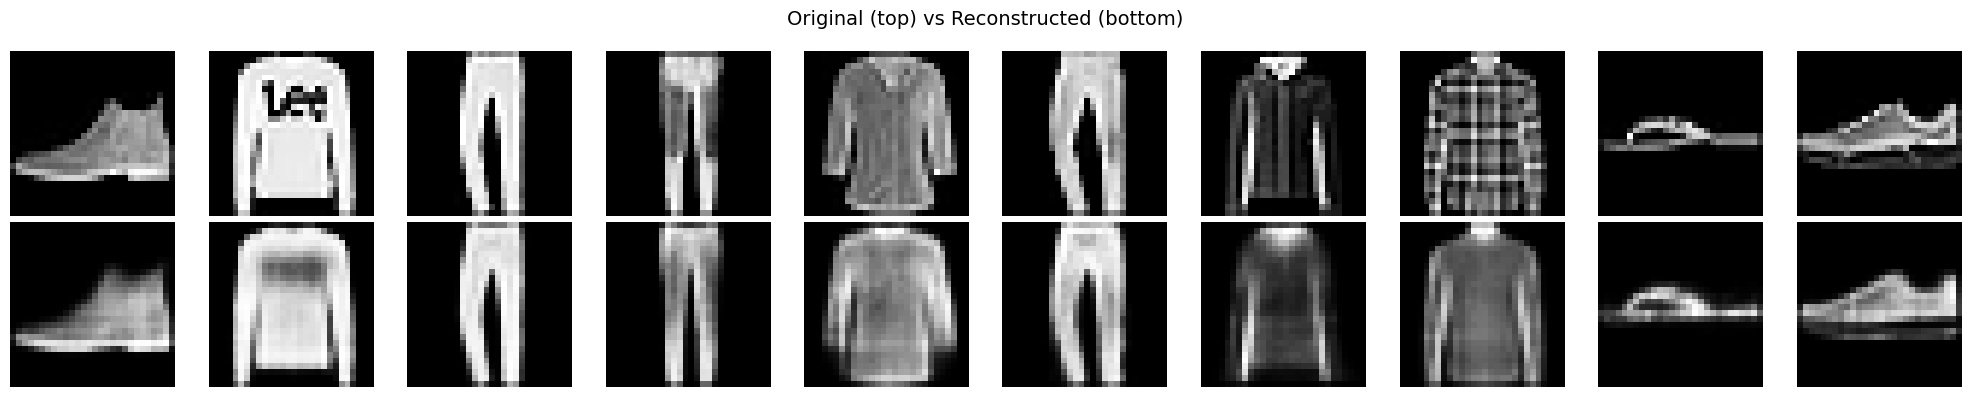


Reconstruction Error: 0.010748


In [26]:
# Visualize
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

plt.suptitle('Original (top) vs Reconstructed (bottom)', fontsize=14)
plt.tight_layout()
plt.show()

print(f"\nReconstruction Error: {np.mean(np.square(x_test - decoded_imgs)):.6f}")

## Vanilla(Basic) vs Deep Autoencoder

| Aspect | Basic Autoencoder (5A) | Deep Autoencoder (5B) |
|--------|------------------------|----------------------|
| **Encoder Layers** | 3 layers (784→256→128→32) | 3 layers (784→128→64→32) |
| **Decoder Layers** | 3 layers (32→128→256→784) | 3 layers (32→64→128→784) |
| **Architecture Type** | Wider layers | Narrower, more gradual |
| **Total Layers** | 6 (3 encoder + 3 decoder) | 6 (3 encoder + 3 decoder) |
| **Depth** | Same depth | Same depth |
| **Width** | Wider (256 neurons max) | Narrower (128 neurons max) |
| **Total Parameters** | 476,720 | 222,384 |
| **Parameter Reduction** | - | 53% fewer |
| **Training Epochs** | 10 | 50 |

---

**Parameter Comparison: Basic vs Deep Autoencoder**<br>

**Parameter Calculation Formula**<br>

For a Dense layer: **Parameters = (Input_Dim × Output_Dim) + Output_Dim**
The "+ Output_Dim" represents the bias terms (one bias per neuron).
<br>

**Layer-by-Layer Parameter Breakdown**<br>
**Basic Autoencoder (5A) - Detailed Calculation**

**Encoder:**
- **Layer 1**: (784 × 256) + 256 = 200,704 + 256 = **200,960** parameters
- **Layer 2**: (256 × 128) + 128 = 32,768 + 128 = **32,896** parameters
- **Layer 3**: (128 × 32) + 32 = 4,096 + 32 = **4,128** parameters
- **Encoder Subtotal**: 200,960 + 32,896 + 4,128 = **237,984** parameters

**Decoder:**
- **Layer 4**: (32 × 128) + 128 = 4,096 + 128 = **4,224** parameters
- **Layer 5**: (128 × 256) + 256 = 32,768 + 256 = **33,024** parameters
- **Layer 6**: (256 × 784) + 784 = 200,704 + 784 = **201,488** parameters
- **Decoder Subtotal**: 4,224 + 33,024 + 201,488 = **238,736** parameters

**Total**: 237,984 + 238,736 = **476,720** parameters

**Deep Autoencoder (5B) - Detailed Calculation**

**Encoder:**
- **Layer 1**: (784 × 128) + 128 = 100,352 + 128 = **100,480** parameters
- **Layer 2**: (128 × 64) + 64 = 8,192 + 64 = **8,256** parameters
- **Layer 3**: (64 × 32) + 32 = 2,048 + 32 = **2,080** parameters
- **Encoder Subtotal**: 100,480 + 8,256 + 2,080 = **110,816** parameters

**Decoder:**
- **Layer 4**: (32 × 64) + 64 = 2,048 + 64 = **2,112** parameters
- **Layer 5**: (64 × 128) + 128 = 8,192 + 128 = **8,320** parameters
- **Layer 6**: (128 × 784) + 784 = 100,352 + 784 = **101,136** parameters
- **Decoder Subtotal**: 2,112 + 8,320 + 101,136 = **111,568** parameters

**Total**: 110,816 + 111,568 = **222,384** parameters


| Layer | Basic AE Neurons | Basic AE Parameters | Deep AE Neurons | Deep AE Parameters | Difference |
|-------|-----------------|---------------------|-----------------|-------------------|------------|
| **Encoder Layer 1** | 256 | 200,960 | 128 | 100,480 | -50% |
| **Encoder Layer 2** | 128 | 32,896 | 64 | 8,256 | -75% |
| **Encoder Layer 3 (Bottleneck)** | 32 | 4,128 | 32 | 2,080 | -50% |
| **Decoder Layer 1** | 128 | 4,224 | 64 | 2,112 | -50% |
| **Decoder Layer 2** | 256 | 33,024 | 128 | 8,320 | -75% |
| **Decoder Layer 3 (Output)** | 784 | 201,488 | 784 | 101,136 | -50% |
| **TOTAL** | - | **476,720** | - | **222,384** | **-53%** |

---

**Parameter Distribution Comparison**

| Section | Basic AE | Deep AE | Reduction |
|---------|----------|---------|-----------|
| **Encoder Parameters** | 237,984 (49.9%) | 110,816 (49.8%) | -53.4% |
| **Decoder Parameters** | 238,736 (50.1%) | 111,568 (50.2%) | -53.3% |
| **Total Parameters** | 476,720 (100%) | 222,384 (100%) | -53.3% |

**Key Observation**: Both architectures maintain nearly perfect balance between encoder and decoder parameters (~50% each).

---

**Model Size Comparison**

| Metric | Basic AE | Deep AE | Difference |
|--------|----------|---------|------------|
| **Parameters** | 476,720 | 222,384 | -254,336 (-53%) |
| **Model Size (float32)** | ~1.82 MB | ~0.85 MB | -0.97 MB (-53%) |
| **Model Size (float16)** | ~0.91 MB | ~0.43 MB | -0.48 MB (-53%) |
| **Memory During Training** | Higher | Lower | More GPU/RAM efficient |
| **Disk Space** | ~2 MB | ~1 MB | Easier to deploy |

**Calculation**: Parameters × 4 bytes (float32) = Size in bytes

**Why Fewer Parameters is Better**

| Advantage | Benefit |
|-----------|---------|
| **Faster Training** | Fewer weights to update each iteration |
| **Less Memory** | Smaller GPU/RAM requirements |
| **Faster Inference** | Quicker predictions in production |
| **Easier Deployment** | Smaller model files, faster downloads |
| **Mobile-Friendly** | Fits better on resource-constrained devices |
| **Lower Overfitting Risk** | Fewer parameters = less chance to memorize |
| **Better Generalization** | Model forced to learn essential features only |

**Weight Matrix Size Comparison**

| Connection | Basic AE Matrix | Deep AE Matrix | Size Reduction |
|-----------|----------------|----------------|----------------|
| **Input → Layer 1** | 784 × 256 | 784 × 128 | 50% smaller |
| **Layer 1 → Layer 2** | 256 × 128 | 128 × 64 | 50% smaller |
| **Layer 2 → Bottleneck** | 128 × 32 | 64 × 32 | 50% smaller |
| **Bottleneck → Layer 4** | 32 × 128 | 32 × 64 | 50% smaller |
| **Layer 4 → Layer 5** | 128 × 256 | 64 × 128 | 50% smaller |
| **Layer 5 → Output** | 256 × 784 | 128 × 784 | 50% smaller |

**Impact**: Smaller matrices mean:
- Faster matrix multiplications
- Better gradient flow
- Less memory consumption
- More efficient backpropagation

---

**Deep Autoencoder Architecture Breakdown**

| Layer | Type | Input Dim | Output Dim | Activation | Parameters | Purpose |
|-------|------|-----------|------------|------------|------------|---------|
| **Input** | Input | - | 784 | - | 0 | Flattened image |
| **Encoder 1** | Dense | 784 | 128 | ReLU | 100,480 | First compression (6.1× reduction) |
| **Encoder 2** | Dense | 128 | 64 | ReLU | 8,256 | Further compression (2× reduction) |
| **Encoder 3 (Bottleneck)** | Dense | 64 | 32 | ReLU | 2,080 | Final compression (2× reduction) |
| **Decoder 1** | Dense | 32 | 64 | ReLU | 2,112 | Start expansion (2× increase) |
| **Decoder 2** | Dense | 64 | 128 | ReLU | 8,320 | Continue expansion (2× increase) |
| **Decoder 3 (Output)** | Dense | 128 | 784 | Sigmoid | 101,136 | Final reconstruction (6.1× increase) |

**Total Parameters**: 222,384

---

**Training Comparison**

| Parameter | Basic Autoencoder (5A) | Deep Autoencoder (5B) | Reason for Difference |
|-----------|------------------------|----------------------|----------------------|
| **Epochs** | 10 | 50 | Deeper networks need more training |
| **Batch Size** | 256 | 256 | Same |
| **Shuffle** | True | True | Same |
| **Validation** | Yes | Yes | Same |
| **Optimizer** | Adam | Adam | Same |
| **Loss Function** | Binary Cross-Entropy | Binary Cross-Entropy | Same |
| **Expected Final Loss** | ~0.095 | ~0.080 | Deep achieves lower loss |
| **Training Time per Epoch** | Slower (more params) | Faster (fewer params) | Parameter efficiency |
| **Total Training Time** | Shorter (10 epochs) | Longer (50 epochs) | More epochs needed |
| **Convergence Speed** | Faster | Slower but steadier | Architecture difference |

**Why 50 epochs for Deep Autoencoder?**
1. Deeper networks converge slower
2. Hierarchical features need more iterations to learn
3. Gradual compression requires more fine-tuning
4. Better final reconstruction quality achieved

---

**Deep vs Basic Autoencoder: Detailed Comparison**

**Architecture Philosophy**

| Aspect | Basic Autoencoder | Deep Autoencoder |
|--------|------------------|------------------|
| **Compression Strategy** | Large initial compression | Gradual compression |
| **First Layer** | 784 → 256 (3× reduction) | 784 → 128 (6× reduction) |
| **Middle Layer** | 256 → 128 (2× reduction) | 128 → 64 (2× reduction) |
| **Bottleneck Layer** | 128 → 32 (4× reduction) | 64 → 32 (2× reduction) |
| **Parameter Efficiency** | 476,720 params | 222,384 params |
| **Model Size** | Larger (~1.82 MB) | Smaller (~0.85 MB) |
| **Training Speed per Epoch** | Slower | Faster |
| **Convergence** | Faster (10 epochs) | Slower (50 epochs needed) |
| **Feature Hierarchy** | Less granular | More granular |

**Performance Characteristics**

| Metric | Basic Autoencoder | Deep Autoencoder |
|--------|------------------|------------------|
| **Reconstruction Quality** | Good | Better (with enough training) |
| **Training Time** | Shorter (10 epochs) | Longer (50 epochs) |
| **Memory Usage** | Higher | Lower (53% reduction) |
| **Overfitting Risk** | Higher (more params) | Lower (fewer params) |
| **Fine Details** | May lose some | Better preservation |
| **Generalization** | Good | Better |
| **Model Deployment** | Larger file size | Smaller, more efficient |
| **Inference Speed** | Slightly slower | Slightly faster |

**When to Use Which?**

**Use Basic Autoencoder (5A) when:**
- Quick results needed (fewer epochs)
- Simple compression task
- Less concern about model size
- Training time is limited
- Prototyping and experimentation
- Educational purposes

**Use Deep Autoencoder (5B) when:**
- Better reconstruction quality required
- More hierarchical feature learning desired
- Model size/memory is a constraint
- Willing to train longer for better results
- Reduced overfitting is important
- Production deployment planned
- Mobile or edge device deployment

---

**Key Insights**

**1. Gradual Compression is Better**<br>
The deep autoencoder's gradual compression (784→128→64→32) preserves more information at each stage compared to aggressive compression (784→256→128→32).

**Compression Steps:**
- **Basic**: 784 ÷3.06→ 256 ÷2→ 128 ÷4→ 32
- **Deep**: 784 ÷6.1→ 128 ÷2→ 64 ÷2→ 32

Result: Smoother information flow in Deep autoencoder.

**2. Fewer Parameters ≠ Worse Performance**<br>
Despite having 53% fewer parameters (222K vs 477K), the deep autoencoder can achieve better reconstruction quality with proper training.

**Why?**
- More efficient parameter usage
- Better gradient flow through smaller matrices
- Reduced redundancy in learned features
- Less prone to overfitting

**3. Training Time Trade-off**<br>
- **Basic**: 10 epochs × slower per epoch = faster total time
- **Deep**: 50 epochs × faster per epoch = longer total time
- **Trade-off**: Worth it for better quality and smaller model

**4. Hierarchical Learning**<br>
The deep architecture learns features at multiple scales:

| Layer | Feature Level | What It Learns |
|-------|--------------|----------------|
| **Encoder Layer 1** (128) | Low-level | Edges, textures, simple patterns |
| **Encoder Layer 2** (64) | Mid-level | Shapes, parts, object components |
| **Encoder Layer 3** (32) | High-level | Object identity, semantic meaning |
| **Decoder Layer 1** (64) | Mid-level | Reconstruct object parts |
| **Decoder Layer 2** (128) | Low-level | Reconstruct basic features |
| **Decoder Layer 3** (784) | Pixel-level | Final image reconstruction |

**5. Better Gradient Flow**<br>
Smaller weight matrices in the deep autoencoder lead to:
- More stable gradients during backpropagation
- Less vanishing gradient problem
- Better convergence properties
- More consistent training behavior

**Matrix Size Comparison:**<br>

| Connection | Basic AE | Deep AE | Reduction |
|-----------|----------|---------|-----------|
| Input → Layer 1 | 784×256 | 784×128 | 50% smaller |
| Layer 1 → Layer 2 | 256×128 | 128×64 | 50% smaller |
| Layer 2 → Bottleneck | 128×32 | 64×32 | 50% smaller |

Smaller matrices = better gradient propagation!

**6. The "Deep" Terminology**<br>
Despite having the same number of layers, this is called "Deep" because:

1. **More Refined Stages**: Each layer performs a smaller, more focused transformation
2. **Hierarchical Learning**: Features are learned at multiple granularity levels
3. **Better Information Flow**: Gradual changes help preserve information
4. **Efficient Architecture**: Achieves superior results with fewer parameters

**Note**: In modern deep learning, "deep" typically refers to many layers (10+), but in the context of autoencoder literature, "deep" emphasizes the architectural refinement and hierarchical learning approach.

**7. Practical Benefits Summary**<br>

| Benefit | Impact |
|---------|--------|
| **53% fewer parameters** | Faster training per epoch, less memory |
| **Smaller model size** | Easier deployment, especially mobile/edge |
| **Better reconstruction** | Higher quality outputs with proper training |
| **Lower overfitting** | Better generalization to unseen data |
| **Hierarchical features** | More interpretable learned representations |
| **Efficient inference** | Faster predictions in production |

**Bottom Line**: The Deep Autoencoder demonstrates that **smarter architecture design** (gradual compression) can outperform **brute-force approaches** (more neurons) while using only half the parameters!

---

# Image Denoising using Autoencoders

In [27]:
from keras.datasets import mnist
import numpy as np

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
print (x_train.shape)

# Normalize to [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print (x_train.shape)

# Reshape to (samples, height, width, channels)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print (x_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000, 28, 28)
(60000, 28, 28, 1)


### Adding GAUSSIAN Noise to Original image

`x_train_noisy = x_train + noise_factor * np.random.normal(...)`

**Formula for EACH pixel:**

```
Noisy Pixel = **Clean** Pixel + (0.5 × Random Noise)
```
---

**Detailed Example - Pixel by Pixel**

Let's say we have a clean image with these pixel values:

**Original Clean Image (5×5 pixels):**
```
0.0  0.2  0.5  0.8  1.0
0.1  0.3  0.6  0.9  0.7
0.0  0.4  0.7  1.0  0.8
0.2  0.5  0.8  0.6  0.4
0.0  0.1  0.3  0.5  0.0
```

**Random Noise Generated (from Normal distribution):**
```
-0.5   1.2  -0.8   0.3   1.6
 0.9  -1.1   0.4  -0.2   0.7
-0.3   0.8   1.3  -0.6  -0.9
 1.1  -0.4   0.5   0.8  -1.2
 0.2   0.6  -0.7   1.0   0.3
```

**After Multiplying by noise_factor (0.5):**
```
Noise: -0.5 * 0.5 = -0.25   0.6  -0.4   0.15   0.8
Noise: 0.9 * 0.5 =  0.45  -0.55  0.2  -0.1    0.35
Noise: -0.3 * 0.5 = -0.15   0.4   0.65 -0.3   -0.45
Noise: 1.1 * 0.5 =  0.55  -0.2   0.25  0.4   -0.6
Noise: 0.2 * 0.5 =  0.1    0.3  -0.35  0.5    0.15
```

**Adding to Original (Clean + Noise):**
```
Original:  0.0  + Noise: -0.25  = -0.25  →  clip to 0.0
Original:  0.2  + Noise:  0.6   =  0.8   ✓
Original:  0.5  + Noise: -0.4   =  0.1   ✓
Original:  0.8  + Noise:  0.15  =  0.95  ✓
Original:  1.0  + Noise:  0.8   =  1.8   →  clip to 1.0

Original:  0.1  + Noise:  0.45  =  0.55  ✓
Original:  0.3  + Noise: -0.55  = -0.25  →  clip to 0.0
...and so on
```

**Final Noisy Image (after clipping):**
```
0.0  0.8  0.1  0.95  1.0
0.55 0.0  0.8  0.8   1.0
0.0  0.8  1.0  0.7   0.35
0.75 0.3  1.0  1.0   0.0
0.1  0.4  0.0  1.0   0.15
```

In [28]:
# ADD GAUSSIAN NOISE
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip values to [0, 1] range
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#### NOISE Visualization

BEFORE AND AFTER ADDING NOISE


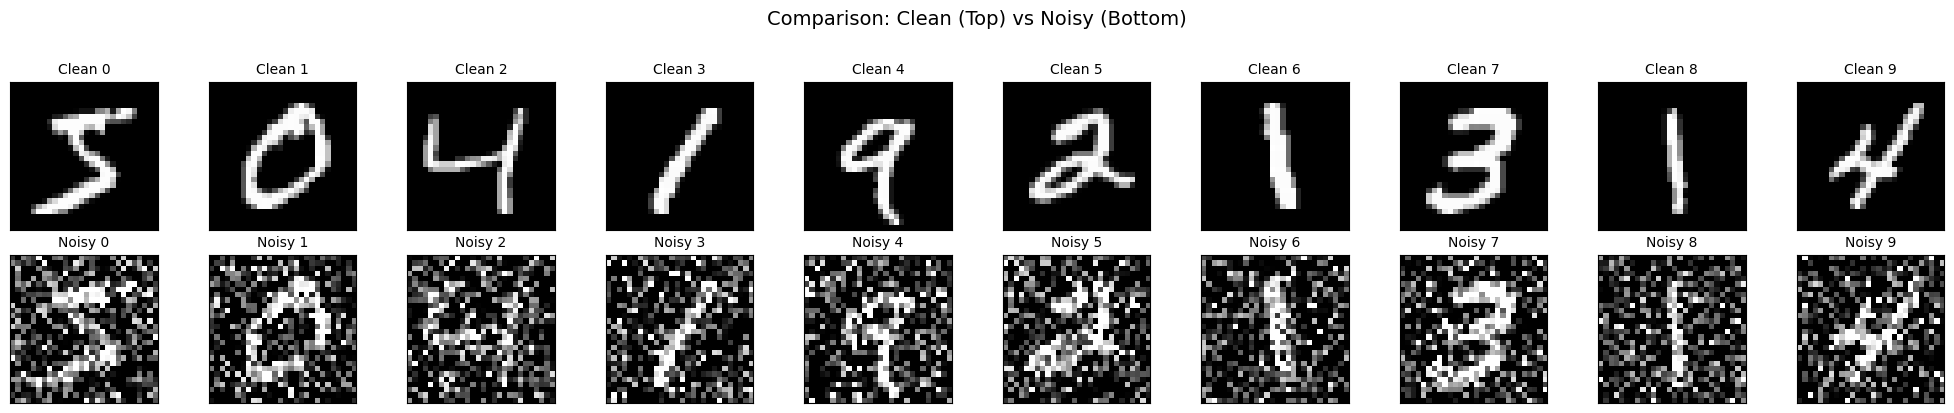


Noise Statistics:
  Clean images range: [0.000, 1.000]
  Noisy images range: [0.000, 1.000]
  Average noise added: 0.2042


In [29]:
import matplotlib.pyplot as plt

def visualize_noise_comparison(x_clean, x_noisy, n_images=10):
    """
    Visualize clean images vs noisy images side by side

    Args:
        x_clean: Clean images
        x_noisy: Noisy images
        n_images: Number of images to display

    plt.subplot(2, 10, i + 1)
                 │   │    │
                 │   │    └─ Position (starts at 1 to 10)
                 │   └────── Number of columns
                 └────────── Number of rows

    plt.subplot(2, 10, i + 1 + n_images)
                 │   │    │
                 │   │    └─ Position (starts at 11 to 20)
                 │   └────── Number of columns
                 └────────── Number of rows
    """
    plt.figure(figsize=(20, 4))

    for i in range(n_images):
        # Display original (clean) image
        ax = plt.subplot(2, n_images, i + 1)
        plt.imshow(x_clean[i].reshape(28, 28), cmap='gray')
        plt.title(f'Clean {i}', fontsize=10)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display noisy image
        ax = plt.subplot(2, n_images, i + 1 + n_images)
        plt.imshow(x_noisy[i].reshape(28, 28), cmap='gray')
        plt.title(f'Noisy {i}', fontsize=10)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.suptitle('Comparison: Clean (Top) vs Noisy (Bottom)', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

# Visualize the noise effect
print("=" * 60)
print("BEFORE AND AFTER ADDING NOISE")
print("=" * 60)
visualize_noise_comparison(x_train, x_train_noisy, n_images=10)

# Print statistics about the noise
print(f"\nNoise Statistics:")
print(f"  Clean images range: [{x_train.min():.3f}, {x_train.max():.3f}]")
print(f"  Noisy images range: [{x_train_noisy.min():.3f}, {x_train_noisy.max():.3f}]")
print(f"  Average noise added: {np.mean(np.abs(x_train - x_train_noisy)):.4f}")

### Building the Convolutional Autoencoder


**Layer-by-Layer Transformations**

| Layer | Input Shape | Output Shape | Operation | Parameters |
|-------|-------------|--------------|-----------|------------|
| **Input** | - | (28, 28, 1) | - | 0 |
| **Conv2D** | (28, 28, 1) | (28, 28, 32) | Feature extraction | 320 |
| **MaxPool2D** | (28, 28, 32) | **(14, 14, 32)** | ↓ Downsample | 0 |
| **Conv2D** | (14, 14, 32) | (14, 14, 32) | Feature refinement | 9,248 |
| **MaxPool2D** | (14, 14, 32) | **(7, 7, 32)** | ↓ Downsample | 0 |
| **Conv2D** | (7, 7, 32) | (7, 7, 32) | Begin reconstruction | 9,248 |
| **UpSample2D** | (7, 7, 32) | **(14, 14, 32)** | ↑ Upsample | 0 |
| **Conv2D** | (14, 14, 32) | (14, 14, 32) | Refine features | 9,248 |
| **UpSample2D** | (14, 14, 32) | **(28, 28, 32)** | ↑ Upsample | 0 |
| **Conv2D** | (28, 28, 32) | **(28, 28, 1)** | Final output | 289 |

**Total Parameters:** 28,353

---

**Universal Output Size Formula**

**General Formula for Conv2D and Pooling**

$$O = \frac{I - K + 2P}{S} + 1$$

Where:
- **O** = Output size (height or width)
- **I** = Input size (height or width)
- **K** = Kernel size (or Pool size)
- **P** = Padding size
- **S** = Stride

---

**Conv2D Calculations (padding='same', stride=1)**

For **padding='same'** with stride=1, padding is calculated as:
$$P = \frac{K - 1}{2}$$

**Example: Conv2D(32, (3,3), padding='same')**
- Input: 28×28
- Kernel: K = 3
- Padding: $P = \frac{3-1}{2} = 1$
- Stride: S = 1

$$O = \frac{28 - 3 + 2(1)}{1} + 1 = \frac{28 - 3 + 2}{1} + 1 = \frac{27}{1} + 1 = 28$$

**Result:** 28×28 (same size as input) ✓

---

**MaxPooling2D Calculations**

**Configuration:** MaxPooling2D((2, 2), padding='same')
- Pool size: K = 2
- Stride: S = 2 (typically equals pool size)
- Padding: P = 0 (for 'same' with stride=2, no padding needed)

**First MaxPooling:** (28×28×32) → (14×14×32)
$$O = \frac{28 - 2 + 2(0)}{2} + 1 = \frac{26}{2} + 1 = 13 + 1 = 14$$

**Second MaxPooling:** (14×14×32) → (7×7×32)
$$O = \frac{14 - 2 + 2(0)}{2} + 1 = \frac{12}{2} + 1 = 6 + 1 = 7$$

---

**Summary Table: Downsampling**

| Stage | Input | K | P | S | Calculation | Output |
|-------|-------|---|---|---|-------------|--------|
| **Conv1** | 28 | 3 | 1 | 1 | $(28-3+2)/1+1$ | **28** |
| **Pool1** | 28 | 2 | 0 | 2 | $(28-2+0)/2+1$ | **14** |
| **Conv2** | 14 | 3 | 1 | 1 | $(14-3+2)/1+1$ | **14** |
| **Pool2** | 14 | 2 | 0 | 2 | $(14-2+0)/2+1$ | **7** |

**Bottleneck reached:** 7×7×32

---

**Upsampling Formulas**

**UpSampling2D Calculation**

**Formula:**
$$O = I \times F$$

Where:
- **O** = Output size
- **I** = Input size
- **F** = Upsampling factor

**For our architecture (factor=2):**

**First UpSampling:** (7×7×32) → (14×14×32)
$$O = 7 \times 2 = 14$$

**Second UpSampling:** (14×14×32) → (28×28×32)
$$O = 14 \times 2 = 28$$

**Complete upsampling path:**
$$7 \xrightarrow{\times 2} 14 \xrightarrow{\times 2} 28$$

---

**Alternative: Transposed Convolution Formula**

If using Conv2DTranspose instead of UpSampling2D:

$$O = S \times (I - 1) + K - 2P$$

Where:
- **S** = Stride
- **I** = Input size
- **K** = Kernel size
- **P** = Padding

**Example:** Conv2DTranspose with stride=2, kernel=2, padding=0:
$$O = 2 \times (7 - 1) + 2 - 0 = 2 \times 6 + 2 = 14$$

---

**Parameter Calculations**

**Conv2D Parameters

**Formula:**
$$\text{Parameters} = (\text{Kernel}_h \times \text{Kernel}_w \times \text{Input Channels} + 1) \times \text{Output Channels}$$

**Examples:**

1. **First Conv2D:** `(3 × 3 × 1 + 1) × 32 = 10 × 32 = 320`
2. **Second Conv2D:** `(3 × 3 × 32 + 1) × 32 = 289 × 32 = 9,248`
3. **Output Conv2D:** `(3 × 3 × 32 + 1) × 1 = 289 × 1 = 289`

---

**Key Concepts**

**1. Conv2D (Convolutional Layer)**
```
Purpose: Extract spatial features
Filters: 32 (learns 32 different patterns)
Kernel: 3×3 (local receptive field)
Activation: ReLU → max(0, x)
Padding: 'same' → output size = input size
```

**2. MaxPooling2D (Downsampling)**
```
Purpose: Reduce spatial dimensions, keep strongest features
Pool Size: 2×2
Operation: Takes maximum value from each 2×2 block
Effect: Reduces dimensions by 2× (28→14→7)
```

**How it works:**
```
Input 2×2:          Output 1×1:
┌────┬────┐        
│0.2 │0.8 │  →  max(0.2, 0.8, 0.3, 0.5) = 0.8
├────┼────┤        
│0.3 │0.5 │        
└────┴────┘        
```

**3. UpSampling2D (Upsampling)**
```
Purpose: Increase spatial dimensions
Factor: 2× (doubles each dimension)
Method: Nearest neighbor (repeats pixels)
Effect: Expands dimensions (7→14→28)
```

**How it works:**
```
Input 1×1:     Output 2×2:
┌────┐        ┌────┬────┐
│ A  │   →    │ A  │ A  │
└────┘        ├────┼────┤
              │ A  │ A  │
              └────┴────┘
```

**4. Activation Functions**

**ReLU (Hidden Layers):**
$$f(x) = \max(0, x) = \begin{cases} x & \text{if } x > 0 \\ 0 & \text{if } x \leq 0 \end{cases}$$

**Sigmoid (Output Layer):**
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

Output range: [0, 1] → Perfect for pixel values!

---

**Loss Function**

**Binary Cross-Entropy:**
$$\mathcal{L} = -\frac{1}{N}\sum_{i=1}^{N}[y_i \log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)]$$

Where:
- $y_i$ = actual clean pixel value
- $\hat{y}_i$ = predicted pixel value
- $N$ = total number of pixels (28 × 28 = 784)

---

**Complete Information Flow**

```
NOISY INPUT (28×28×1)
        ↓
    ┌───────┐
    │ENCODER│ Compress → Learn noise-free features
    └───────┘
        ↓
Conv2D(32)    → (28×28×32)  Extract features
MaxPool(2×2)  → (14×14×32)  ↓ Downsample (÷2)
Conv2D(32)    → (14×14×32)  Refine features
MaxPool(2×2)  → (7×7×32)    ↓ Downsample (÷2) [BOTTLENECK]
        ↓
    ┌───────┐
    │DECODER│ Reconstruct → Build clean image
    └───────┘
        ↓
Conv2D(32)    → (7×7×32)    Begin reconstruction
UpSample(2×)  → (14×14×32)  ↑ Upsample (×2)
Conv2D(32)    → (14×14×32)  Refine reconstruction
UpSample(2×)  → (28×28×32)  ↑ Upsample (×2)
Conv2D(1)     → (28×28×1)   Final clean output (sigmoid)
        ↓
CLEAN OUTPUT (28×28×1)
```

---

**Why This Works for Denoising**

**Training Process:**
1. **Input:** Noisy image (28×28×1)
2. **Target:** Clean image (28×28×1)
3. **Loss:** Difference between output and clean target
4. **Learning:** Network learns to remove noise

**Key Insight:**
```
Noise:  Random, inconsistent, different every time  Filtered out
Signal: Structured, consistent, predictable         Preserved
```

**Bottleneck Effect:**
- Only 7×7×32 = 1,568 values (vs 784 input pixels)
- Forces network to keep only essential information
- Noise doesn't compress well → Gets discarded
- Digit structure compresses well → Gets preserved

---


**Summary

| Aspect | Value |
|--------|-------|
| **Input** | 28×28×1 noisy image |
| **Bottleneck** | 7×7×32 compressed representation |
| **Output** | 28×28×1 clean image |
| **Parameters** | 28,353 |
| **Compression** | 28×28 → 7×7 (16× spatial reduction) |
| **Task** | Remove Gaussian noise from images |
| **Loss** | Binary Cross-Entropy |
| **Optimizer** | Adam |

**Key Success Factors:**
- Convolutional layers preserve spatial structure
- Bottleneck forces compression (noise filtered out)
- Training on noisy→clean pairs teaches denoising
- Small model (28K params) vs Dense AE (222K-477K params)

In [30]:
input_img = keras.Input(shape=(28, 28, 1))

# ENCODER
encoded = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
encoded = layers.MaxPooling2D((2, 2), padding='same')(encoded)
encoded = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
encoded = layers.MaxPooling2D((2, 2), padding='same')(encoded)

# At this point the representation is (7, 7, 32)

# DECODER
decoded = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
decoded = layers.UpSampling2D((2, 2))(decoded)
decoded = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(decoded)
decoded = layers.UpSampling2D((2, 2))(decoded)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

### Training the Denoising Autoencoder

In [31]:
autoencoder.fit(
    x_train_noisy, x_train,     # KEY: Input=Noisy, Target=Clean!
    epochs=10,
    batch_size=1024,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 13s 112ms/step - loss: 0.4682 - val_loss: 0.1923
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1758 - val_loss: 0.1486
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1447 - val_loss: 0.1317
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1312 - val_loss: 0.1242
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1244 - val_loss: 0.1205
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1207 - val_loss: 0.1173
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1178 - val_loss: 0.1154
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1158 - val_loss: 0.1136
Epoch 9/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1145 - val_loss: 0.1121
Epoch 10/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1134 - val_loss: 0.1109


### Visualization

In [32]:
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


First row is orignal images


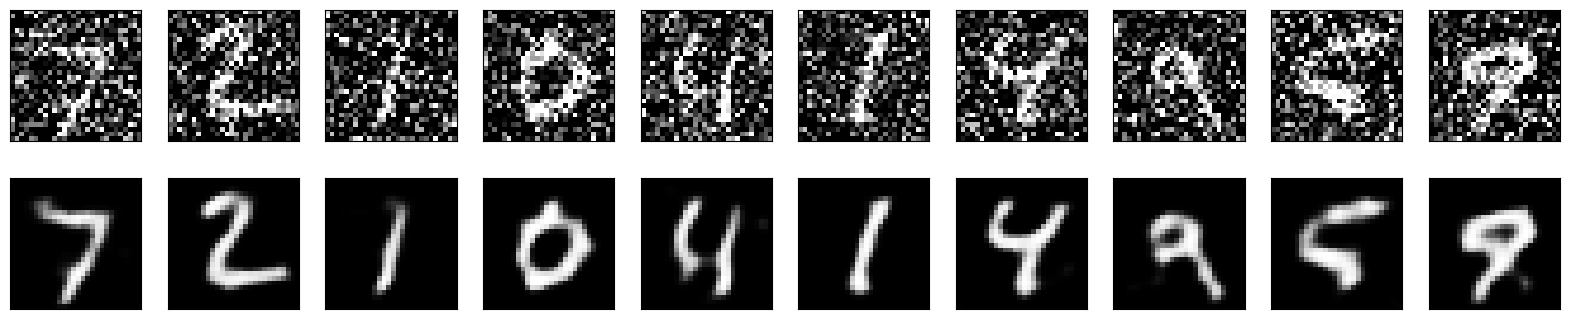

Second row is reconstrcuted images


In [33]:
import matplotlib.pyplot as plt

print('First row is orignal images')
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display noisy (input)
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised (output)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
print('Second row is reconstrcuted images')